The scatter plot of solar generation with day-ahead market price

Merged rows: 35126
Correlation (Solar vs SDAC Price): -0.409


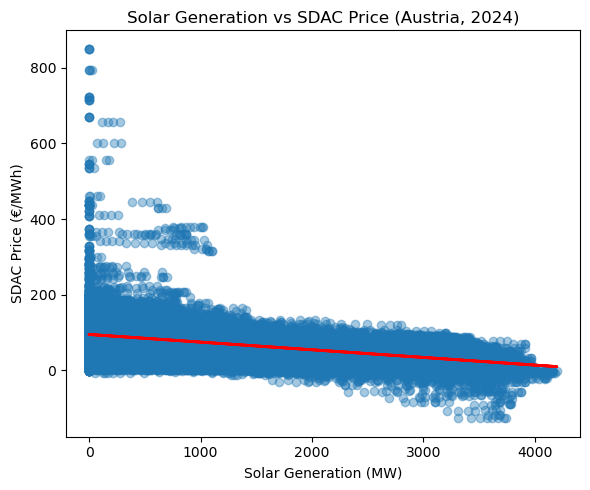

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# 1) LOAD DATA
# -----------------------------
gen_df   = pd.read_csv("generation_AT_2024.csv")
price_df = pd.read_csv("price_AT_2024.csv")

# -----------------------------
# 2) COLUMN NAMES
# -----------------------------
GEN_TIME  = "MTU (CET/CEST)"
GEN_TYPE  = "Production Type"
GEN_VALUE = "Generation (MW)"

PRICE_TIME  = "MTU (CET/CEST)"
PRICE_SEQ   = "Sequence"
PRICE_VALUE = "Day-ahead Price (EUR/MWh)"

# -----------------------------
# 3) TIME PARSING
# -----------------------------
def parse_start(series):
    start = series.astype(str).str.split(" - ").str[0].str.strip()
    return pd.to_datetime(start, dayfirst=True, errors="coerce")

gen_df["Start"]   = parse_start(gen_df[GEN_TIME])
price_df["Start"] = parse_start(price_df[PRICE_TIME])

gen_df   = gen_df.dropna(subset=["Start"])
price_df = price_df.dropna(subset=["Start"])

# -----------------------------
# 4) SOLAR GENERATION (MW)
# -----------------------------
solar = gen_df[gen_df[GEN_TYPE].str.contains("solar", case=False, na=False)].copy()

solar["Solar_MW"] = pd.to_numeric(
    solar[GEN_VALUE].astype(str).str.replace(",", "."),
    errors="coerce"
)

solar = (
    solar[["Start", "Solar_MW"]]
    .groupby("Start", as_index=False)
    .sum()
)

# -----------------------------
# 5) SDAC PRICE ONLY
# -----------------------------
price_df["Sequence"] = price_df[PRICE_SEQ].str.lower()

sdac = price_df[price_df["Sequence"].str.contains("sdac|sequence 1", na=False)].copy()

sdac["Price_SDAC"] = pd.to_numeric(
    sdac[PRICE_VALUE].astype(str).str.replace(",", "."),
    errors="coerce"
)

sdac = (
    sdac[["Start", "Price_SDAC"]]
    .dropna()
    .groupby("Start", as_index=False)
    .mean()
)

# -----------------------------
# 6) MERGE
# -----------------------------
data = pd.merge(solar, sdac, on="Start", how="inner").sort_values("Start")
print("Merged rows:", len(data))

# -----------------------------
# 7) CORRELATION
# -----------------------------
corr = data["Solar_MW"].corr(data["Price_SDAC"])
print(f"Correlation (Solar vs SDAC Price): {corr:.3f}")

# -----------------------------
# 8) SCATTER + TRENDLINE
# -----------------------------
x = data["Solar_MW"]
y = data["Price_SDAC"]

coef  = np.polyfit(x, y, 1)
trend = np.poly1d(coef)

plt.figure(figsize=(6, 5))
plt.scatter(x, y, alpha=0.4)
plt.plot(x, trend(x), color="red", linewidth=2)
plt.title("Solar Generation vs SDAC Price (Austria, 2024)")
plt.xlabel("Solar Generation (MW)")
plt.ylabel("SDAC Price (€/MWh)")
plt.tight_layout()
plt.show()


Heatmap of solar generation and day-ahead market price

Correlation between solar generation with day-ahead market price

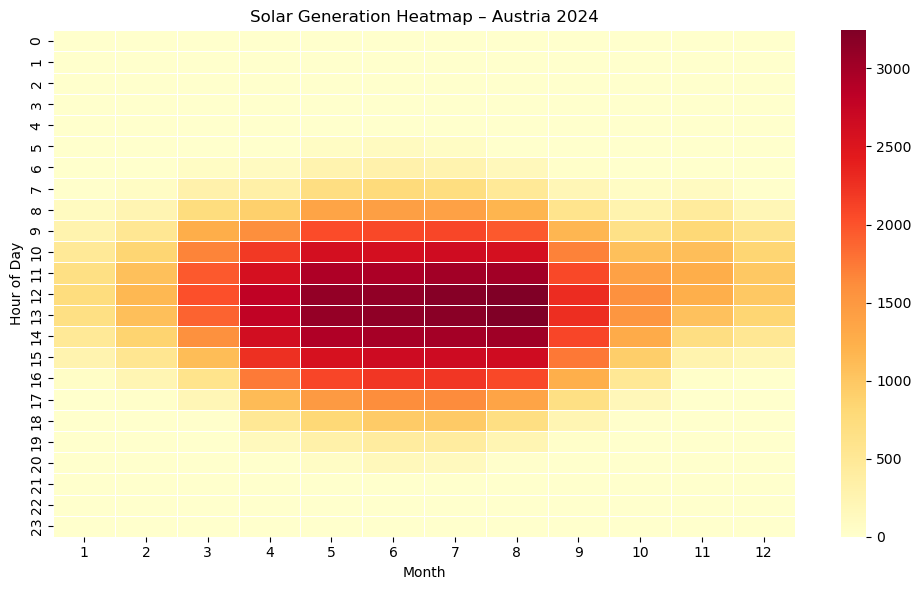

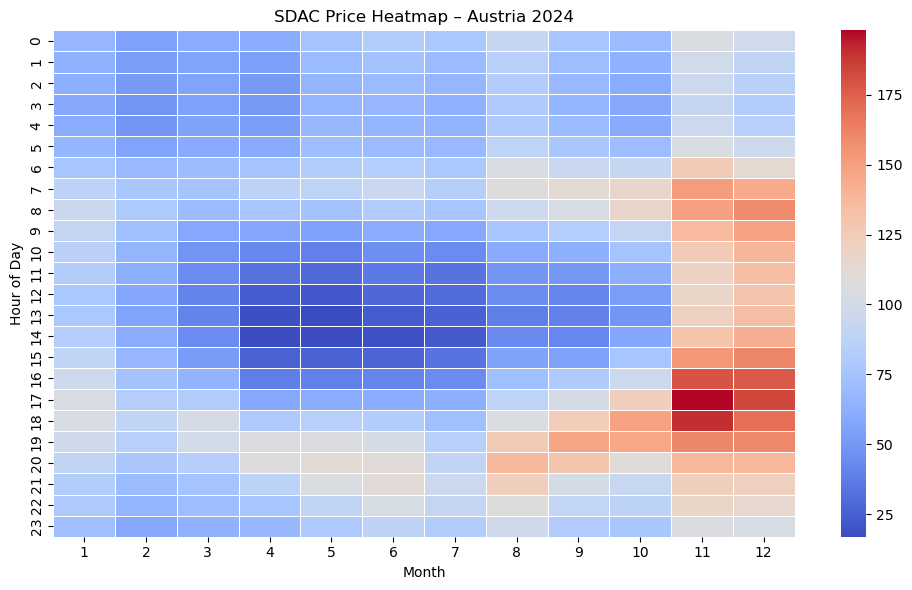

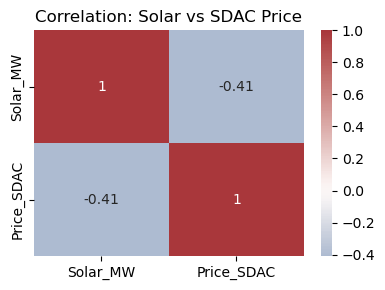

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = data.copy()

df['Start'] = pd.to_datetime(df['Start'])
df['Month'] = df['Start'].dt.month
df['Hour']  = df['Start'].dt.hour

# ============================
# Solar heatmap
# ============================
solar_pivot = df.pivot_table(
    values='Solar_MW',
    index='Hour',
    columns='Month',
    aggfunc='mean'
)

plt.figure(figsize=(10,6))
sns.heatmap(solar_pivot, cmap='YlOrRd', linewidths=0.5)
plt.title("Solar Generation Heatmap – Austria 2024")
plt.xlabel("Month")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()

# ============================
# Price heatmap
# ============================
price_pivot = df.pivot_table(
    values='Price_SDAC',
    index='Hour',
    columns='Month',
    aggfunc='mean'
)

plt.figure(figsize=(10,6))
sns.heatmap(price_pivot, cmap='coolwarm', linewidths=0.5)
plt.title("SDAC Price Heatmap – Austria 2024")
plt.xlabel("Month")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()

# ============================
# Correlation
# ============================
corr = df[['Solar_MW', 'Price_SDAC']].corr()

plt.figure(figsize=(4,3))
sns.heatmap(corr, annot=True, cmap='vlag', center=0)
plt.title("Correlation: Solar vs SDAC Price")
plt.tight_layout()
plt.show()


The scatter plot of wind generation with day-ahead market price

Heatmap of wind generation day-ahead market price

Correlation between wind generation with day-ahead market price

Merged rows: 35126
Correlation (Wind Onshore vs SDAC Price): -0.104


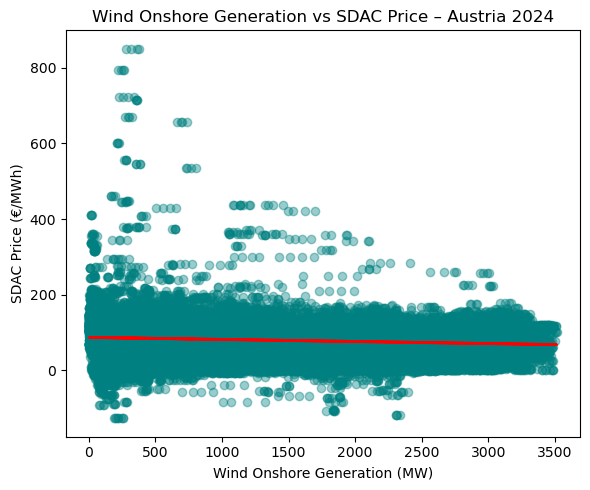

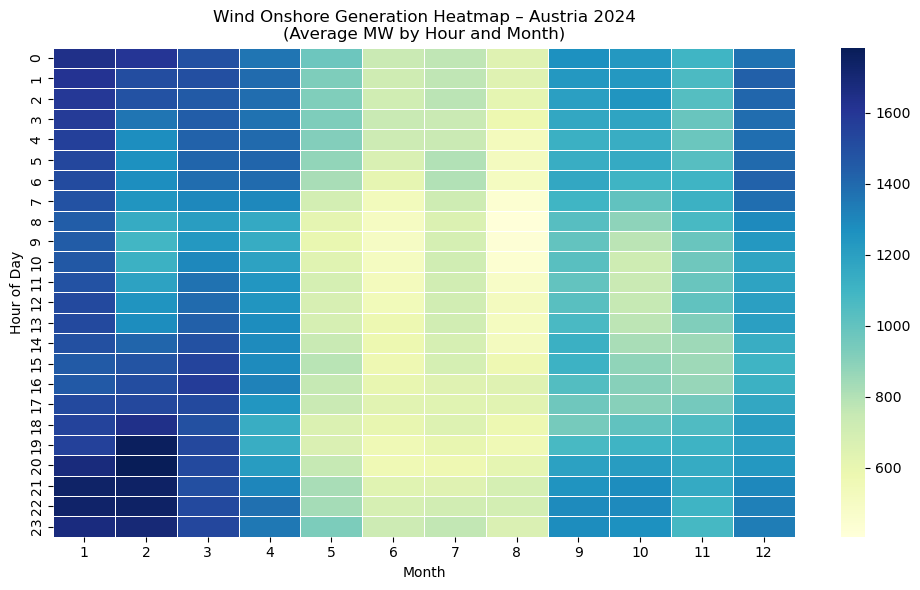

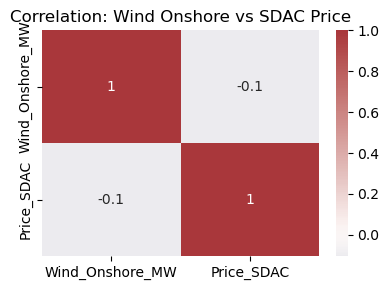

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------------
# 1) LOAD DATA
# -------------------------------------------------
gen_df   = pd.read_csv("generation_AT_2024.csv")
price_df = pd.read_csv("price_AT_2024.csv")

# -------------------------------------------------
# 2) COLUMN NAMES
# -------------------------------------------------
GEN_TIME  = "MTU (CET/CEST)"
GEN_TYPE  = "Production Type"
GEN_VALUE = "Generation (MW)"

PRICE_TIME  = "MTU (CET/CEST)"
PRICE_SEQ   = "Sequence"
PRICE_VALUE = "Day-ahead Price (EUR/MWh)"

# -------------------------------------------------
# 3) TIME PARSING
# -------------------------------------------------
def parse_start(series):
    start = series.astype(str).str.split(" - ").str[0].str.strip()
    return pd.to_datetime(start, dayfirst=True, errors="coerce")

gen_df["Start"]   = parse_start(gen_df[GEN_TIME])
price_df["Start"] = parse_start(price_df[PRICE_TIME])

gen_df   = gen_df.dropna(subset=["Start"])
price_df = price_df.dropna(subset=["Start"])

# -------------------------------------------------
# 4) WIND ONSHORE GENERATION (MW)
# -------------------------------------------------
wind_df = gen_df[
    gen_df[GEN_TYPE].str.contains("wind onshore", case=False, na=False)
].copy()

wind_df["Wind_Onshore_MW"] = pd.to_numeric(
    wind_df[GEN_VALUE].astype(str).str.replace(",", "."),
    errors="coerce"
)

wind_df = (
    wind_df[["Start", "Wind_Onshore_MW"]]
    .groupby("Start", as_index=False)
    .sum()
)

# -------------------------------------------------
# 5) SDAC PRICE ONLY
# -------------------------------------------------
price_df["Sequence"] = price_df[PRICE_SEQ].str.lower()

sdac_df = price_df[
    price_df["Sequence"].str.contains("sdac|sequence 1", na=False)
].copy()

sdac_df["Price_SDAC"] = pd.to_numeric(
    sdac_df[PRICE_VALUE].astype(str).str.replace(",", "."),
    errors="coerce"
)

sdac_df = (
    sdac_df[["Start", "Price_SDAC"]]
    .dropna()
    .groupby("Start", as_index=False)
    .mean()
)

# -------------------------------------------------
# 6) MERGE
# -------------------------------------------------
data = pd.merge(wind_df, sdac_df, on="Start", how="inner").sort_values("Start")
print("Merged rows:", len(data))

# -------------------------------------------------
# 7) CORRELATION
# -------------------------------------------------
corr = data["Wind_Onshore_MW"].corr(data["Price_SDAC"])
print(f"Correlation (Wind Onshore vs SDAC Price): {corr:.3f}")

# -------------------------------------------------
# 8) SCATTER + TRENDLINE
# -------------------------------------------------
x = data["Wind_Onshore_MW"]
y = data["Price_SDAC"]

coef  = np.polyfit(x, y, 1)
trend = np.poly1d(coef)

plt.figure(figsize=(6,5))
plt.scatter(x, y, alpha=0.4, color="teal")
plt.plot(x, trend(x), color="red", linewidth=2)
plt.title("Wind Onshore Generation vs SDAC Price – Austria 2024")
plt.xlabel("Wind Onshore Generation (MW)")
plt.ylabel("SDAC Price (€/MWh)")
plt.tight_layout()
plt.show()

# -------------------------------------------------
# 9) HEATMAPS (MONTH x HOUR)
# -------------------------------------------------
df = data.copy()
df["Month"] = df["Start"].dt.month
df["Hour"]  = df["Start"].dt.hour

# Wind heatmap
wind_pivot = df.pivot_table(
    values="Wind_Onshore_MW",
    index="Hour",
    columns="Month",
    aggfunc="mean"
)

plt.figure(figsize=(10,6))
sns.heatmap(wind_pivot, cmap="YlGnBu", linewidths=0.5)
plt.title("Wind Onshore Generation Heatmap – Austria 2024\n(Average MW by Hour and Month)")
plt.xlabel("Month")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()

# Correlation heatmap
corr_mat = df[["Wind_Onshore_MW", "Price_SDAC"]].corr()

plt.figure(figsize=(4,3))
sns.heatmap(corr_mat, annot=True, cmap="vlag", center=0)
plt.title("Correlation: Wind Onshore vs SDAC Price")
plt.tight_layout()
plt.show()


The histogram of day-ahead electricity prices

The boxplot of day-ahead electricity price distributions by solar generation

The z-score of market prices compared with solar generation

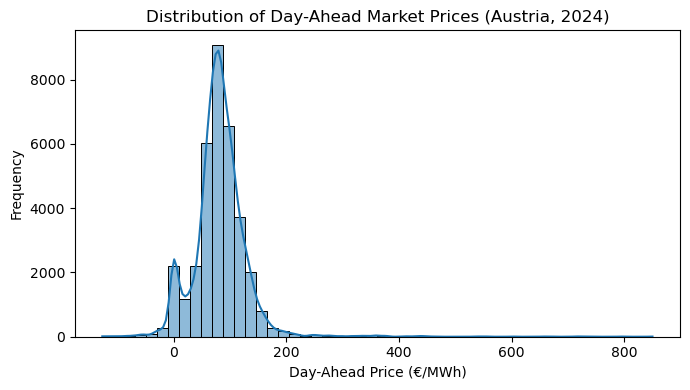

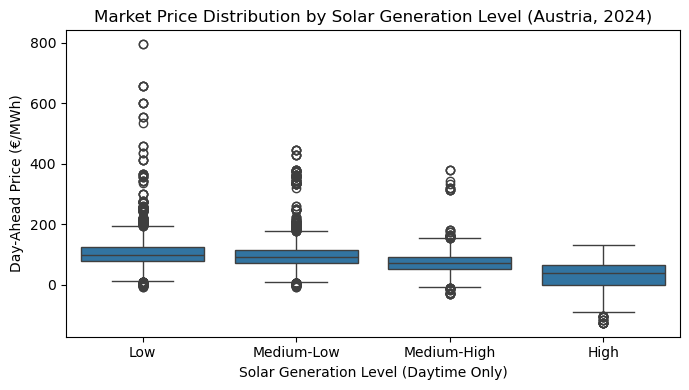

Skewness:
Solar_Generation_MW    1.525149
Price_SDAC             2.855215
dtype: float64


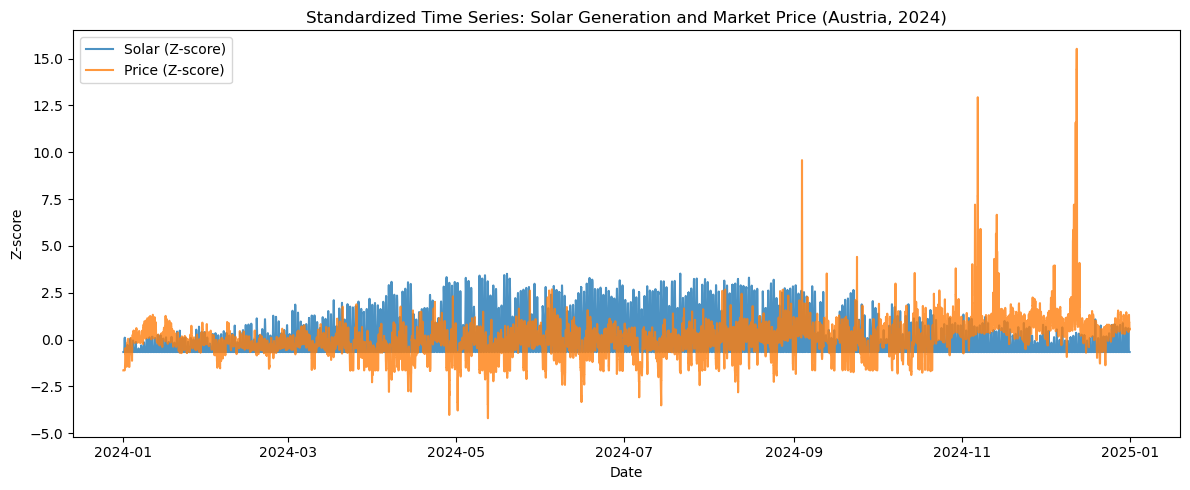

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# -------------------------------------------------
# 1) LOAD DATA
# -------------------------------------------------
gen_df   = pd.read_csv("generation_AT_2024.csv")
price_df = pd.read_csv("price_AT_2024.csv")

# -------------------------------------------------
# 2) COLUMN NAMES
# -------------------------------------------------
GEN_TIME  = "MTU (CET/CEST)"
GEN_TYPE  = "Production Type"
GEN_VALUE = "Generation (MW)"

PRICE_TIME  = "MTU (CET/CEST)"
PRICE_SEQ   = "Sequence"
PRICE_VALUE = "Day-ahead Price (EUR/MWh)"

# -------------------------------------------------
# 3) TIME PARSING
# -------------------------------------------------
def parse_start(series):
    start = series.astype(str).str.split(" - ").str[0].str.strip()
    return pd.to_datetime(start, dayfirst=True, errors="coerce")

gen_df["Start"]   = parse_start(gen_df[GEN_TIME])
price_df["Start"] = parse_start(price_df[PRICE_TIME])

gen_df   = gen_df.dropna(subset=["Start"])
price_df = price_df.dropna(subset=["Start"])

# -------------------------------------------------
# 4) SOLAR GENERATION (HOURLY MW)
# -------------------------------------------------
solar_df = gen_df[
    gen_df[GEN_TYPE].str.contains("solar", case=False, na=False)
].copy()

solar_df["Solar_Generation_MW"] = pd.to_numeric(
    solar_df[GEN_VALUE].astype(str).str.replace(",", "."),
    errors="coerce"
)

solar_df = (
    solar_df[["Start", "Solar_Generation_MW"]]
    .groupby("Start", as_index=False)
    .sum()
)

# -------------------------------------------------
# 5) SDAC PRICE (HOURLY)
# -------------------------------------------------
price_df["Sequence"] = price_df[PRICE_SEQ].str.lower()

sdac_df = price_df[
    price_df["Sequence"].str.contains("sdac|sequence 1", na=False)
].copy()

sdac_df["Price_SDAC"] = pd.to_numeric(
    sdac_df[PRICE_VALUE].astype(str).str.replace(",", "."),
    errors="coerce"
)

sdac_df = (
    sdac_df[["Start", "Price_SDAC"]]
    .dropna()
    .groupby("Start", as_index=False)
    .mean()
)

# -------------------------------------------------
# 6) MERGE (HOURLY DATASET)
# -------------------------------------------------
df = pd.merge(solar_df, sdac_df, on="Start", how="inner").sort_values("Start")

# -------------------------------------------------
# 7) HISTOGRAM: PRICE DISTRIBUTION
# -------------------------------------------------
plt.figure(figsize=(7,4))
sns.histplot(df["Price_SDAC"], bins=50, kde=True)
plt.xlabel("Day-Ahead Price (€/MWh)")
plt.ylabel("Frequency")
plt.title("Distribution of Day-Ahead Market Prices (Austria, 2024)")
plt.tight_layout()
plt.show()

# -------------------------------------------------
# 8) BOXPLOT: PRICE BY SOLAR LEVEL (DAYTIME ONLY)
# -------------------------------------------------
solar_day = df[df["Solar_Generation_MW"] > 0].copy()

solar_day["Solar_Level"] = pd.qcut(
    solar_day["Solar_Generation_MW"],
    q=4,
    labels=["Low", "Medium-Low", "Medium-High", "High"],
    duplicates="drop"
)

plt.figure(figsize=(7,4))
sns.boxplot(x="Solar_Level", y="Price_SDAC", data=solar_day)
plt.xlabel("Solar Generation Level (Daytime Only)")
plt.ylabel("Day-Ahead Price (€/MWh)")
plt.title("Market Price Distribution by Solar Generation Level (Austria, 2024)")
plt.tight_layout()
plt.show()

# -------------------------------------------------
# 9) SKEWNESS
# -------------------------------------------------
skewness = df[["Solar_Generation_MW", "Price_SDAC"]].skew()
print("Skewness:")
print(skewness)

# -------------------------------------------------
# 10) STANDARDIZED (Z-SCORE) TIME SERIES
# -------------------------------------------------
scaler = StandardScaler()
scaled_values = scaler.fit_transform(
    df[["Solar_Generation_MW", "Price_SDAC"]]
)

scaled_df = pd.DataFrame(
    scaled_values,
    columns=["Solar_z", "Price_z"],
    index=df.index
)

scaled_df["Start"] = df["Start"]

plt.figure(figsize=(12,5))
plt.plot(scaled_df["Start"], scaled_df["Solar_z"], label="Solar (Z-score)", alpha=0.8)
plt.plot(scaled_df["Start"], scaled_df["Price_z"], label="Price (Z-score)", alpha=0.8)
plt.xlabel("Date")
plt.ylabel("Z-score")
plt.title("Standardized Time Series: Solar Generation and Market Price (Austria, 2024)")
plt.legend()
plt.tight_layout()
plt.show()


Daily electricity load profile and monthly electricity load profile

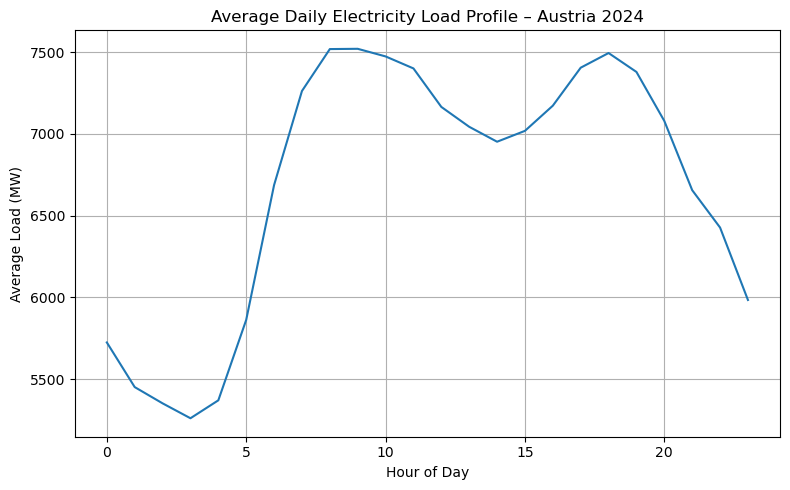

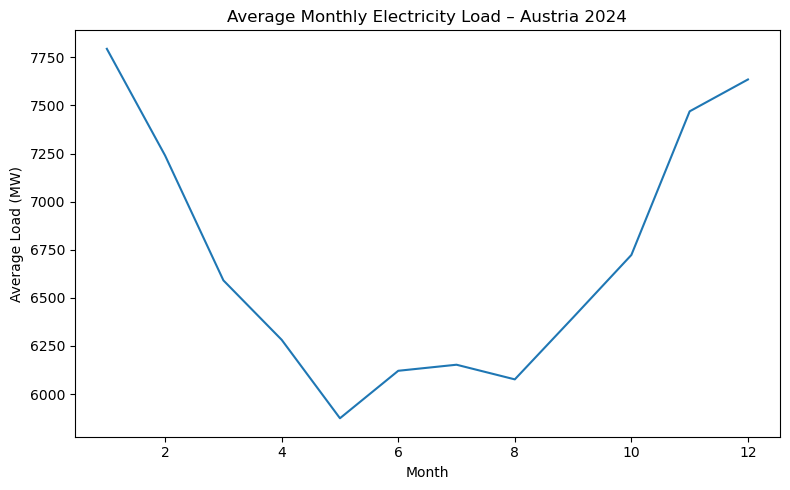

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# -------------------------------------------------
# 1) LOAD DATA
# -------------------------------------------------
load_df = pd.read_csv("load_AT_2024.csv")

# -------------------------------------------------
# 2) TIME PARSING
# -------------------------------------------------
def parse_start(series):
    start = series.astype(str).str.split(" - ").str[0].str.strip()
    return pd.to_datetime(start, dayfirst=True, errors="coerce")

load_df["Start"] = parse_start(load_df["MTU (CET/CEST)"])
load_df = load_df.dropna(subset=["Start"])

# -------------------------------------------------
# 3) CLEAN LOAD (MW)
# -------------------------------------------------
load_df["Load_MW"] = pd.to_numeric(
    load_df["Actual Total Load (MW)"].astype(str).str.replace(",", "."),
    errors="coerce"
)

load_df = load_df.dropna(subset=["Load_MW"])

# -------------------------------------------------
# 4) TIME FEATURES
# -------------------------------------------------
load_df["Hour"]  = load_df["Start"].dt.hour
load_df["Month"] = load_df["Start"].dt.month

# -------------------------------------------------
# 5) AVERAGE DAILY LOAD PROFILE
# -------------------------------------------------
daily_profile = load_df.groupby("Hour")["Load_MW"].mean()

plt.figure(figsize=(8,5))
daily_profile.plot()
plt.title("Average Daily Electricity Load Profile – Austria 2024")
plt.xlabel("Hour of Day")
plt.ylabel("Average Load (MW)")
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------------------------------
# 6) AVERAGE MONTHLY LOAD
# -------------------------------------------------
monthly_avg = load_df.groupby("Month")["Load_MW"].mean().sort_index()

plt.figure(figsize=(8,5))
monthly_avg.plot()
plt.title("Average Monthly Electricity Load – Austria 2024")
plt.xlabel("Month")
plt.ylabel("Average Load (MW)")
plt.tight_layout()
plt.show()


The boxplot of monthly distribution of weekly average electricity load for 2024

<Figure size 1000x500 with 0 Axes>

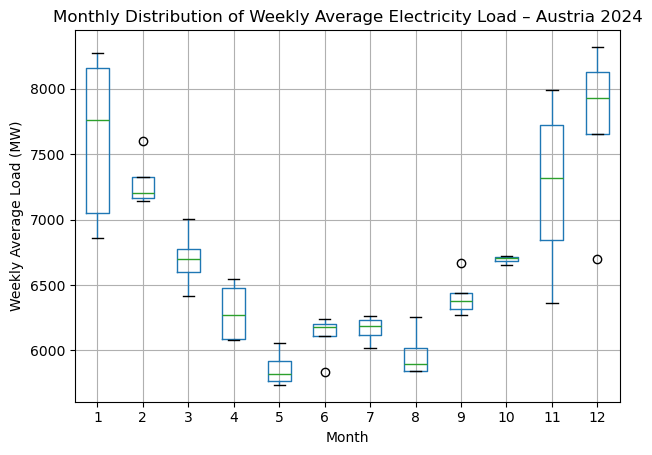

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Assume load_df already prepared with:
# Start (datetime) and Load_MW (numeric)

# -------------------------------------------------
# 1) Create weekly average load
# -------------------------------------------------
load_weekly = (
    load_df
    .set_index("Start")
    .resample("W")["Load_MW"]
    .mean()
    .to_frame()
)

load_weekly = load_weekly.reset_index()

# -------------------------------------------------
# 2) Extract month from week timestamp
# -------------------------------------------------
load_weekly["Month"] = load_weekly["Start"].dt.month

# -------------------------------------------------
# 3) Boxplot: weekly load distribution by month
# -------------------------------------------------
plt.figure(figsize=(10,5))
load_weekly.boxplot(column="Load_MW", by="Month")
plt.title("Monthly Distribution of Weekly Average Electricity Load – Austria 2024")
plt.suptitle("")
plt.xlabel("Month")
plt.ylabel("Weekly Average Load (MW)")
plt.tight_layout()
plt.show()


Time series, the scatter plot with regression and the boxplot of weekly electricity load and day-ahead market price

Weekly observations: 54


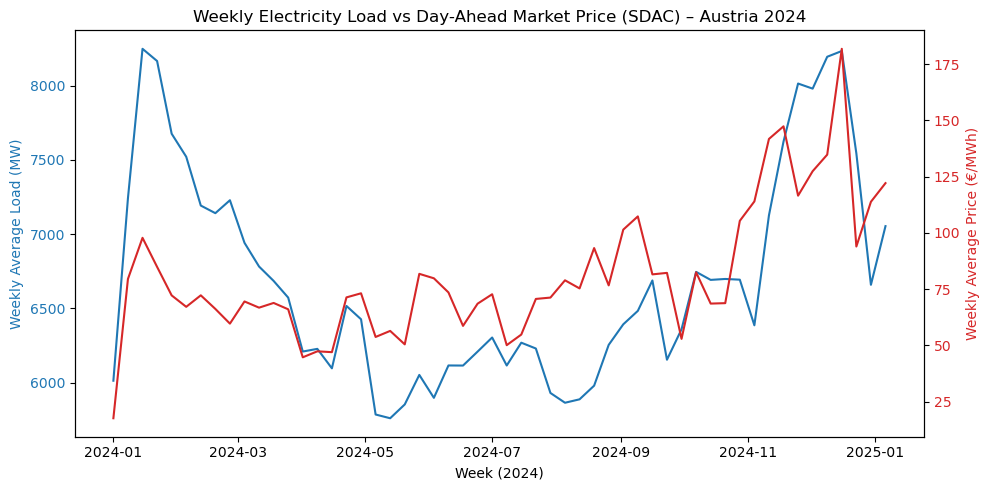

Weekly Load–Price Correlation (SDAC): 0.598


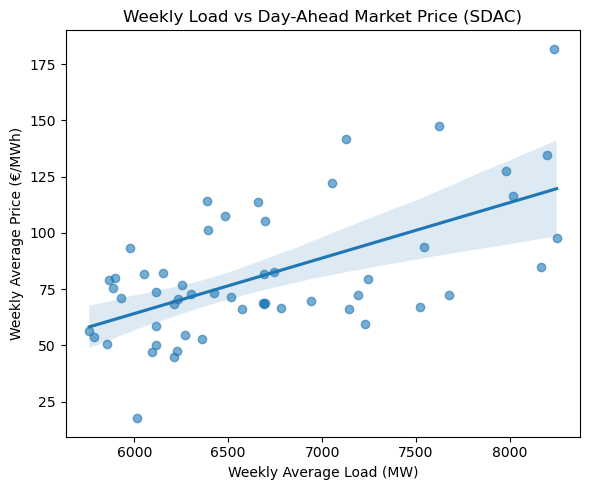

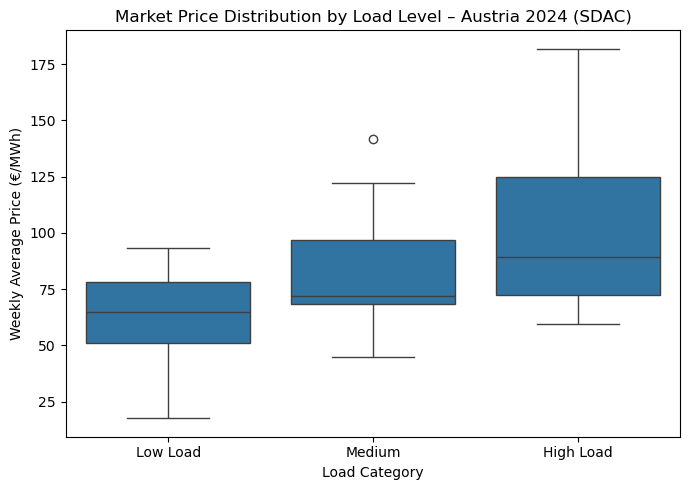

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# -------------------------------------------------
# 1) LOAD DATA
# -------------------------------------------------
load_df  = pd.read_csv("load_AT_2024.csv")
price_df = pd.read_csv("price_AT_2024.csv")

# -------------------------------------------------
# 2) TIME PARSING
# -------------------------------------------------
def parse_start(series):
    start = series.astype(str).str.split(" - ").str[0].str.strip()
    return pd.to_datetime(start, dayfirst=True, errors="coerce")

load_df["Start"]  = parse_start(load_df["MTU (CET/CEST)"])
price_df["Start"] = parse_start(price_df["MTU (CET/CEST)"])

load_df  = load_df.dropna(subset=["Start"])
price_df = price_df.dropna(subset=["Start"])

# -------------------------------------------------
# 3) CLEAN LOAD (MW)
# -------------------------------------------------
load_df["Load_MW"] = pd.to_numeric(
    load_df["Actual Total Load (MW)"].astype(str).str.replace(",", "."),
    errors="coerce"
)

load_df = load_df.dropna(subset=["Load_MW"])

# -------------------------------------------------
# 4) FILTER SDAC PRICES
# -------------------------------------------------
price_df["Sequence"] = price_df["Sequence"].astype(str).str.lower()

price_sdac_df = price_df[
    price_df["Sequence"].str.contains("sdac|sequence 1", na=False)
].copy()

price_sdac_df["Price_EUR_MWh"] = pd.to_numeric(
    price_sdac_df["Day-ahead Price (EUR/MWh)"].astype(str).str.replace(",", "."),
    errors="coerce"
)

price_sdac_df = price_sdac_df.dropna(subset=["Price_EUR_MWh"])

# -------------------------------------------------
# 5) WEEKLY AVERAGES
# -------------------------------------------------
load_weekly = (
    load_df
    .set_index("Start")["Load_MW"]
    .resample("W-MON")          # week starting Monday
    .mean()
    .rename("Load_Weekly_MW")
)

price_weekly = (
    price_sdac_df
    .set_index("Start")["Price_EUR_MWh"]
    .resample("W-MON")
    .mean()
    .rename("Price_Weekly_EUR_MWh")
)

weekly_df = pd.concat([load_weekly, price_weekly], axis=1).dropna()

print("Weekly observations:", len(weekly_df))

# -------------------------------------------------
# 6) DUAL-AXIS TIME SERIES
# -------------------------------------------------
fig, ax1 = plt.subplots(figsize=(10,5))

ax1.plot(
    weekly_df.index,
    weekly_df["Load_Weekly_MW"],
    color="tab:blue"
)
ax1.set_xlabel("Week (2024)")
ax1.set_ylabel("Weekly Average Load (MW)", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.plot(
    weekly_df.index,
    weekly_df["Price_Weekly_EUR_MWh"],
    color="tab:red"
)
ax2.set_ylabel("Weekly Average Price (€/MWh)", color="tab:red")
ax2.tick_params(axis="y", labelcolor="tab:red")

plt.title("Weekly Electricity Load vs Day-Ahead Market Price (SDAC) – Austria 2024")
fig.tight_layout()
plt.show()

# -------------------------------------------------
# 7) CORRELATION
# -------------------------------------------------
corr = weekly_df["Load_Weekly_MW"].corr(
    weekly_df["Price_Weekly_EUR_MWh"]
)
print(f"Weekly Load–Price Correlation (SDAC): {corr:.3f}")

# -------------------------------------------------
# 8) SCATTER + REGRESSION
# -------------------------------------------------
plt.figure(figsize=(6,5))
sns.regplot(
    x="Load_Weekly_MW",
    y="Price_Weekly_EUR_MWh",
    data=weekly_df,
    scatter_kws={"alpha": 0.6}
)
plt.xlabel("Weekly Average Load (MW)")
plt.ylabel("Weekly Average Price (€/MWh)")
plt.title("Weekly Load vs Day-Ahead Market Price (SDAC)")
plt.tight_layout()
plt.show()

# -------------------------------------------------
# 9) PRICE DISTRIBUTION BY LOAD LEVEL
# -------------------------------------------------
low_thr  = weekly_df["Load_Weekly_MW"].quantile(0.25)
high_thr = weekly_df["Load_Weekly_MW"].quantile(0.75)

weekly_df["Load_Category"] = "Medium"
weekly_df.loc[
    weekly_df["Load_Weekly_MW"] <= low_thr, "Load_Category"
] = "Low Load"
weekly_df.loc[
    weekly_df["Load_Weekly_MW"] >= high_thr, "Load_Category"
] = "High Load"

plt.figure(figsize=(7,5))
sns.boxplot(
    x="Load_Category",
    y="Price_Weekly_EUR_MWh",
    data=weekly_df,
    order=["Low Load", "Medium", "High Load"]
)
plt.xlabel("Load Category")
plt.ylabel("Weekly Average Price (€/MWh)")
plt.title("Market Price Distribution by Load Level – Austria 2024 (SDAC)")
plt.tight_layout()
plt.show()


Daily evolution of solar and wind generation, average diurnal solar and wind generation profiles, and monthly average solar and wind generation

C:\Users\mehrd\AppData\Local\Temp\ipykernel_29972\2363255442.py:52: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  .resample("H")["Generation_MW"]


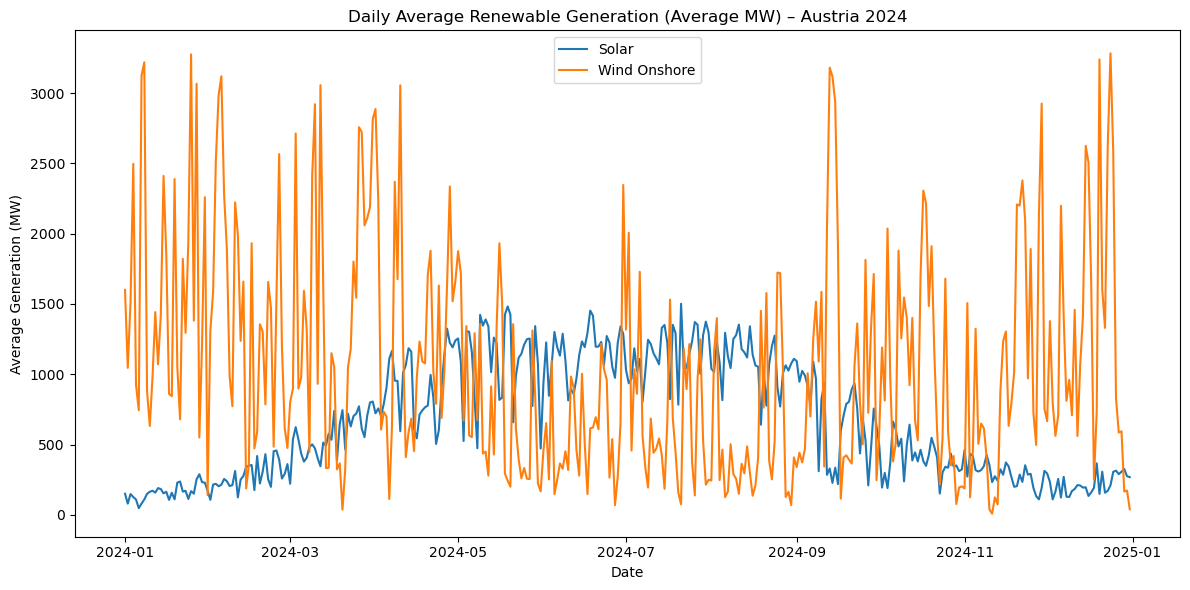

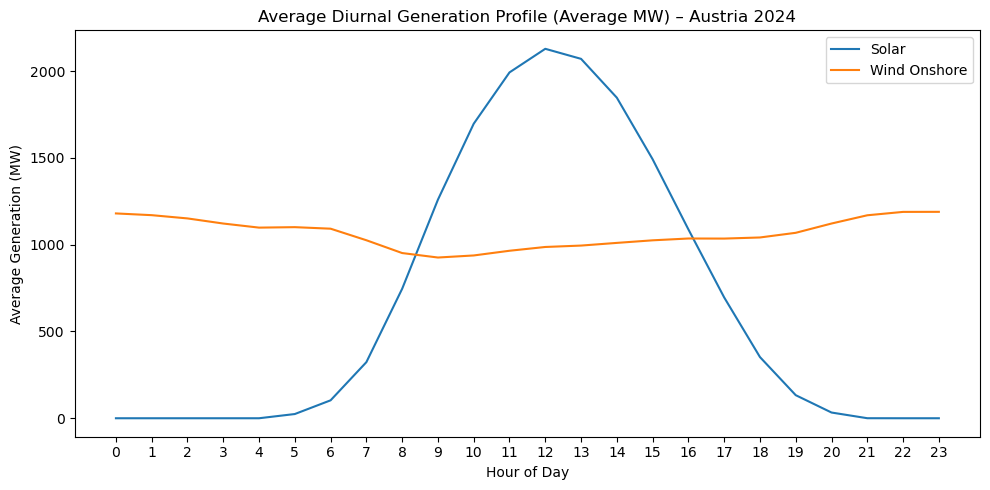

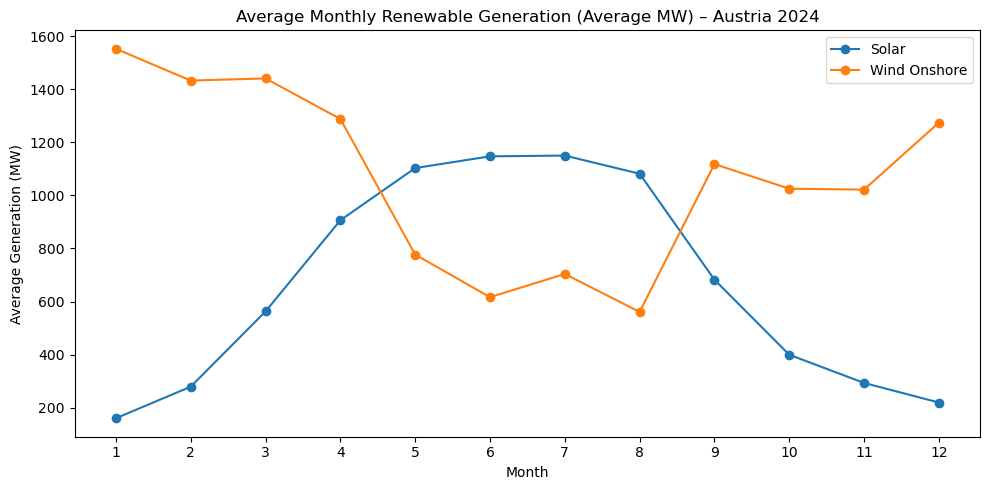

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# =================================================
# Standalone script: Solar & Wind Onshore patterns
# Austria 2024 – Hourly / Daily / Monthly
# =================================================

# -----------------------------
# 1) LOAD DATA
# -----------------------------
gen_df = pd.read_csv("generation_AT_2024.csv")

# Column names (adjust here if your CSV differs)
GEN_TIME  = "MTU (CET/CEST)"
GEN_TYPE  = "Production Type"
GEN_VALUE = "Generation (MW)"

# -----------------------------
# 2) PARSE TIME
# -----------------------------
def parse_start(series):
    start = series.astype(str).str.split(" - ").str[0].str.strip()
    return pd.to_datetime(start, dayfirst=True, errors="coerce")

gen_df["Start"] = parse_start(gen_df[GEN_TIME])
gen_df = gen_df.dropna(subset=["Start"])

# -----------------------------
# 3) FILTER SOLAR + WIND ONSHORE
# -----------------------------
targets = ["Solar", "Wind Onshore"]
gen_res = gen_df[gen_df[GEN_TYPE].isin(targets)].copy()

# Ensure numeric (handle commas)
gen_res["Generation_MW"] = pd.to_numeric(
    gen_res[GEN_VALUE].astype(str).str.replace(",", "."),
    errors="coerce"
)
gen_res = gen_res.dropna(subset=["Generation_MW"])

# Keep minimal columns and set index
gen_res = gen_res[["Start", GEN_TYPE, "Generation_MW"]].set_index("Start").sort_index()

# -----------------------------
# 4) HOURLY DATASET (MEAN MW)
# -----------------------------
# If your raw data is already hourly, this just ensures a clean hourly timeline.
gen_hourly = (
    gen_res
    .groupby(GEN_TYPE)
    .resample("H")["Generation_MW"]
    .mean()
    .reset_index()
)

# Diurnal (hour-of-day) pattern: average MW by hour across the year
gen_hourly["Hour"] = gen_hourly["Start"].dt.hour
hourly_pattern = (
    gen_hourly
    .groupby([GEN_TYPE, "Hour"], as_index=False)["Generation_MW"]
    .mean()
)

# -----------------------------
# 5) DAILY AVERAGE POWER (MEAN MW)
# -----------------------------
# Average power per day (not energy). If you want daily energy, use .sum() and relabel to MWh.
gen_daily = (
    gen_res
    .groupby(GEN_TYPE)
    .resample("D")["Generation_MW"]
    .mean()
    .reset_index()
)

# -----------------------------
# 6) MONTHLY AVERAGE POWER (MEAN MW)
# -----------------------------
gen_monthly = (
    gen_res
    .groupby(GEN_TYPE)
    .resample("MS")["Generation_MW"]   # Month Start
    .mean()
    .reset_index()
)
gen_monthly["Month"] = gen_monthly["Start"].dt.month

# -----------------------------
# 7) PLOTS
# -----------------------------

# 7.1 Daily time series (average MW per day)
plt.figure(figsize=(12,6))
for src in targets:
    subset = gen_daily[gen_daily[GEN_TYPE] == src]
    plt.plot(subset["Start"], subset["Generation_MW"], label=src)
plt.title("Daily Average Renewable Generation (Average MW) – Austria 2024")
plt.xlabel("Date")
plt.ylabel("Average Generation (MW)")
plt.legend()
plt.tight_layout()
plt.show()

# 7.2 Average diurnal profile (hour-of-day)
plt.figure(figsize=(10,5))
for src in targets:
    subset = hourly_pattern[hourly_pattern[GEN_TYPE] == src]
    plt.plot(subset["Hour"], subset["Generation_MW"], label=src)
plt.title("Average Diurnal Generation Profile (Average MW) – Austria 2024")
plt.xlabel("Hour of Day")
plt.ylabel("Average Generation (MW)")
plt.xticks(range(0,24))
plt.legend()
plt.tight_layout()
plt.show()

# 7.3 Monthly average generation (average MW per month)
plt.figure(figsize=(10,5))
for src in targets:
    subset = gen_monthly[gen_monthly[GEN_TYPE] == src]
    plt.plot(subset["Month"], subset["Generation_MW"], marker="o", label=src)
plt.title("Average Monthly Renewable Generation (Average MW) – Austria 2024")
plt.xlabel("Month")
plt.ylabel("Average Generation (MW)")
plt.xticks(range(1,13))
plt.legend()
plt.tight_layout()
plt.show()


Distributions of daily average solar and wind generation

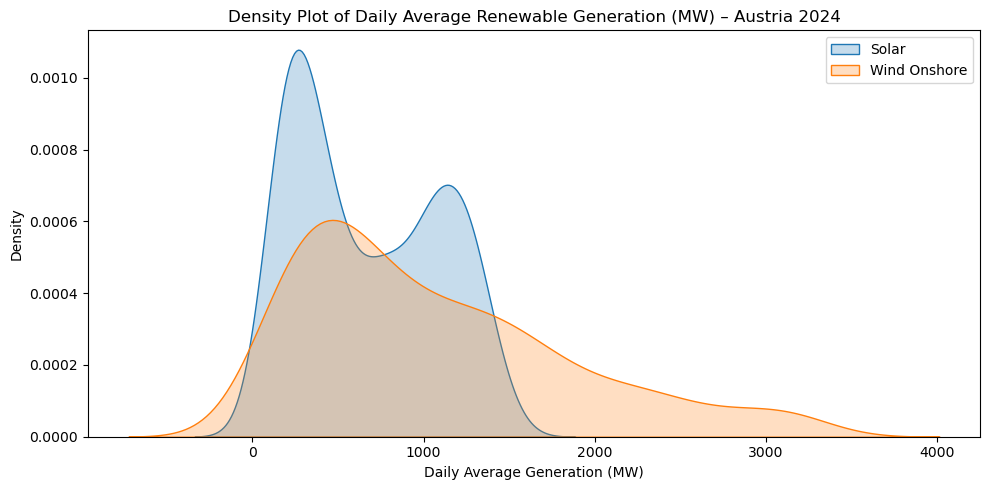

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Requires: gen_daily with columns ["Start", "Production Type", "Generation_MW"]

GEN_TYPE = "Production Type"

plt.figure(figsize=(10,5))

for src in ["Solar", "Wind Onshore"]:
    subset = gen_daily[gen_daily[GEN_TYPE] == src].copy()
    
    # Remove zero generation for KDE stability (especially for solar)
    subset = subset[subset["Generation_MW"] > 0]
    
    sns.kdeplot(
        subset["Generation_MW"],
        label=src,
        fill=True
    )

plt.title("Density Plot of Daily Average Renewable Generation (MW) – Austria 2024")
plt.xlabel("Daily Average Generation (MW)")
plt.ylabel("Density")
plt.legend()
plt.tight_layout()
plt.show()


Daily electricity generation mix in Austria (2024)

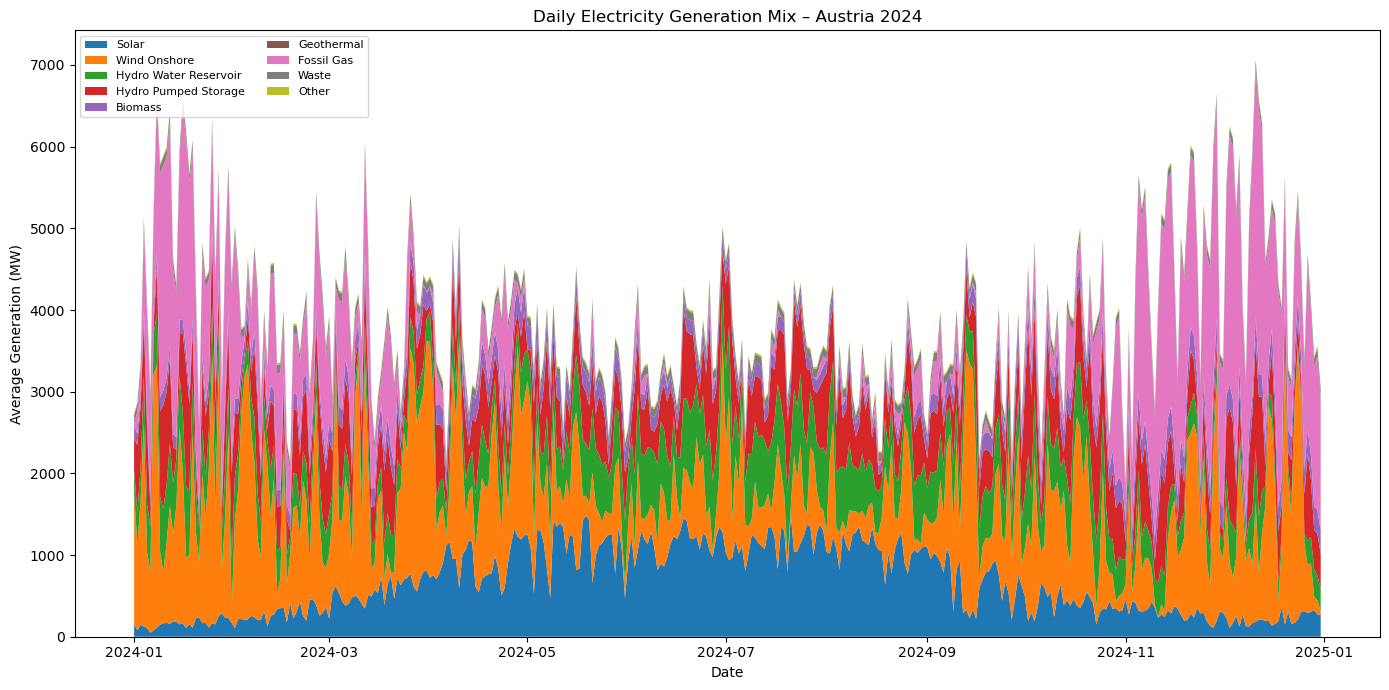

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# =================================================
# 1) LOAD DATA
# =================================================
gen_df = pd.read_csv("generation_AT_2024.csv")

# Column names (adjust here if CSV differs)
GEN_TIME  = "MTU (CET/CEST)"
GEN_TYPE  = "Production Type"
GEN_VALUE = "Generation (MW)"

# =================================================
# 2) PARSE TIME
# =================================================
def parse_start(series):
    start = series.astype(str).str.split(" - ").str[0].str.strip()
    return pd.to_datetime(start, dayfirst=True, errors="coerce")

gen_df["Start"] = parse_start(gen_df[GEN_TIME])
gen_df = gen_df.dropna(subset=["Start"])

# =================================================
# 3) CLEAN GENERATION VALUES
# =================================================
gen_df["Generation_MW"] = pd.to_numeric(
    gen_df[GEN_VALUE].astype(str).str.replace(",", "."),
    errors="coerce"
)
gen_df = gen_df.dropna(subset=["Generation_MW"])

# Keep only what we need
gen_df = gen_df[["Start", GEN_TYPE, "Generation_MW"]]

# =================================================
# 4) DAILY AVERAGE GENERATION BY TYPE (MW)
# =================================================
# Note: this is average power (MW), not energy (MWh)
gen_daily = (
    gen_df
    .set_index("Start")
    .groupby(GEN_TYPE)
    .resample("D")["Generation_MW"]
    .mean()
    .reset_index()
)

# Pivot to wide format: one column per technology
gen_mix_all = gen_daily.pivot(
    index="Start",
    columns=GEN_TYPE,
    values="Generation_MW"
).sort_index()

# =================================================
# 5) DEFINE CATEGORIES
# =================================================
RENEWABLES = [
    "Solar",
    "Wind Onshore",
    "Hydro Run-of-river and pondage",
    "Hydro Water Reservoir",
    "Hydro Pumped Storage",
    "Biomass",
    "Geothermal",
]

FOSSIL = ["Fossil Gas"]

OTHER_NON_RENEWABLE = [
    "Waste",
    "Other"
]

CATEGORIES = RENEWABLES + FOSSIL + OTHER_NON_RENEWABLE

# Keep only columns present in the dataset
cols_present = [c for c in CATEGORIES if c in gen_mix_all.columns]
gen_filtered = gen_mix_all[cols_present]

# =================================================
# 6) STACKED AREA PLOT
# =================================================
plt.figure(figsize=(14,7))

plt.stackplot(
    gen_filtered.index,
    gen_filtered.values.T,
    labels=gen_filtered.columns
)

plt.title("Daily Electricity Generation Mix – Austria 2024")
plt.xlabel("Date")
plt.ylabel("Average Generation (MW)")
plt.legend(loc="upper left", ncol=2, fontsize=8)
plt.tight_layout()
plt.show()


Hourly net cross-border electricity flows in Austria for 2024

The boxplot of net cross-border electricity flows in 2024

Heatmap of net cross-border electricity flows (MW)

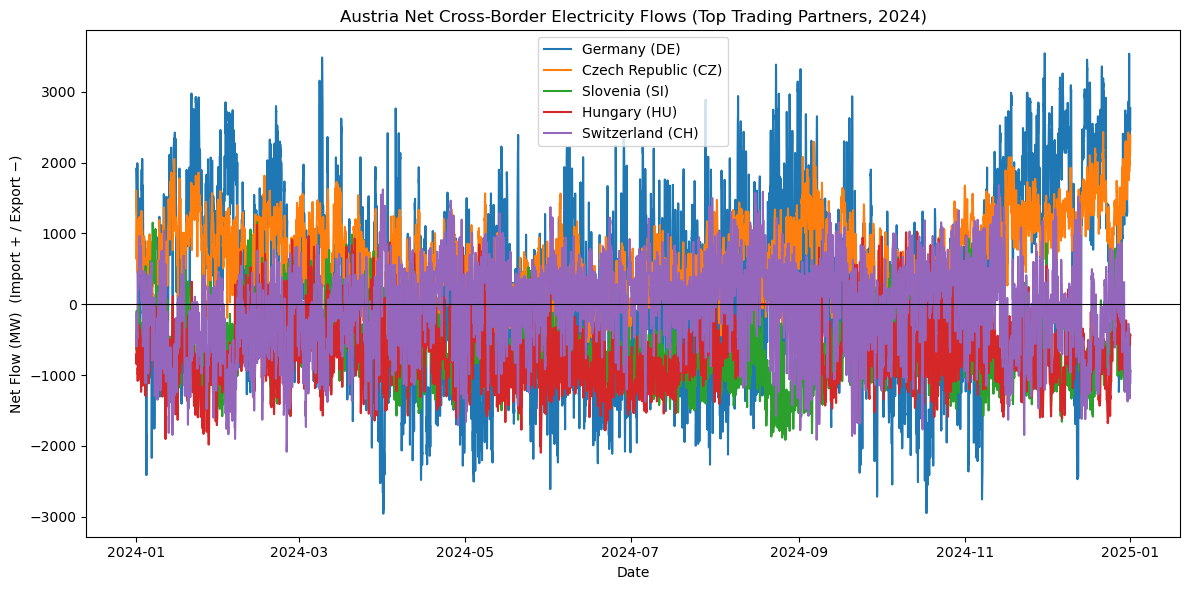

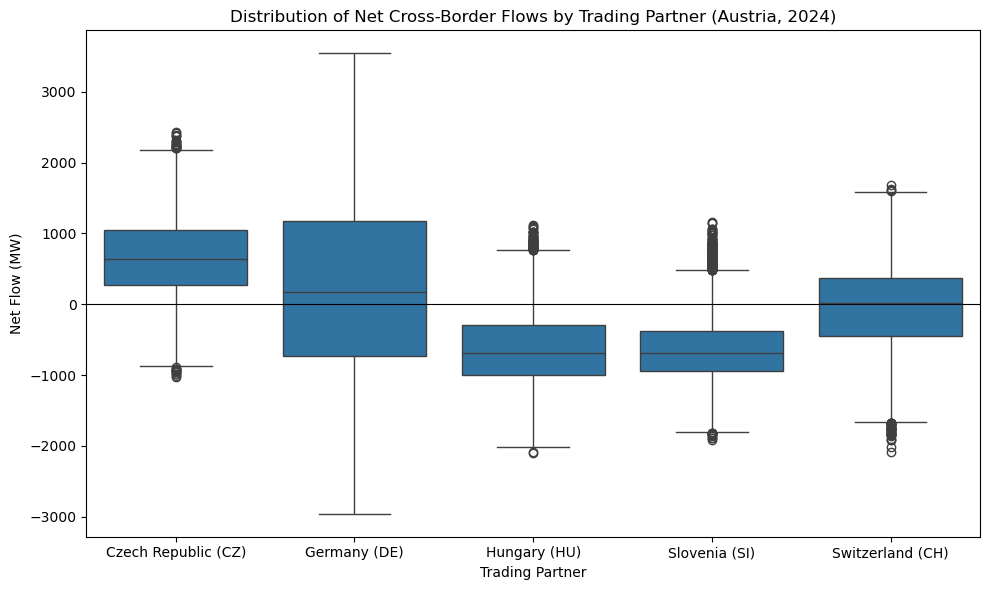

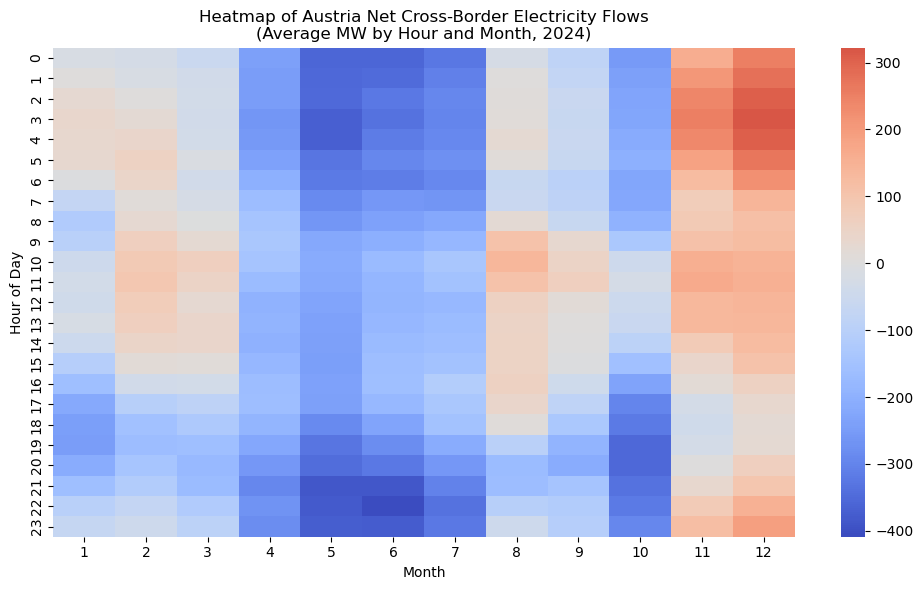

Month              Country  Signed_Flow_MW
0  2024-01  Czech Republic (CZ)      858.576478
1  2024-01         Germany (DE)      730.551384
2  2024-01         Hungary (HU)     -835.175578
3  2024-01           Italy (IT)     -308.580645
4  2024-01        Slovenia (SI)     -526.763575

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# =================================================
# 1) LOAD DATA
# =================================================
flow_df = pd.read_csv("AT_crossborder_2024.csv")

# Expected columns:
# MTU | Out Area | In Area | Physical Flow (MW)
flow_df.columns = ["MTU", "Out_Area", "In_Area", "Flow_MW"]

# =================================================
# 2) PARSE TIME
# =================================================
def parse_start(series):
    start = series.astype(str).str.split(" - ").str[0].str.strip()
    return pd.to_datetime(start, dayfirst=True, errors="coerce")

flow_df["Start"] = parse_start(flow_df["MTU"])
flow_df = flow_df.dropna(subset=["Start"])

# Ensure numeric flow
flow_df["Flow_MW"] = pd.to_numeric(flow_df["Flow_MW"], errors="coerce")
flow_df = flow_df.dropna(subset=["Flow_MW"])

# =================================================
# 3) DEFINE IMPORTS / EXPORTS (AUSTRIA SIGN CONVENTION)
# Import  -> positive
# Export  -> negative
# =================================================
imports = flow_df[
    flow_df["In_Area"].str.contains("Austria", case=False, na=False)
].copy()

imports["Country"] = imports["Out_Area"]
imports["Signed_Flow_MW"] = imports["Flow_MW"]

exports = flow_df[
    flow_df["Out_Area"].str.contains("Austria", case=False, na=False)
].copy()

exports["Country"] = exports["In_Area"]
exports["Signed_Flow_MW"] = -exports["Flow_MW"]

# Combine
at_flows = pd.concat([imports, exports], ignore_index=True)
at_flows = at_flows[["Start", "Country", "Signed_Flow_MW"]]

# =================================================
# 4) NET FLOW BY COUNTRY AND TIME
# =================================================
net_flow = (
    at_flows
    .groupby(["Start", "Country"], as_index=False)["Signed_Flow_MW"]
    .sum()
    .sort_values("Start")
)

# =================================================
# 5) SELECT MAJOR TRADING PARTNERS
# (by average absolute flow, not row count)
# =================================================
top_countries = (
    net_flow
    .groupby("Country")["Signed_Flow_MW"]
    .apply(lambda x: x.abs().mean())
    .sort_values(ascending=False)
    .head(5)
    .index
)

net_flow_top = net_flow[net_flow["Country"].isin(top_countries)]

# =================================================
# 6) TIME SERIES: NET FLOWS (TOP COUNTRIES)
# =================================================
plt.figure(figsize=(12,6))

for c in top_countries:
    subset = net_flow_top[net_flow_top["Country"] == c]
    plt.plot(subset["Start"], subset["Signed_Flow_MW"], label=c)

plt.axhline(0, color="black", linewidth=0.8)
plt.title("Austria Net Cross-Border Electricity Flows (Top Trading Partners, 2024)")
plt.xlabel("Date")
plt.ylabel("Net Flow (MW)  (Import + / Export −)")
plt.legend()
plt.tight_layout()
plt.show()

# =================================================
# 7) DISTRIBUTION BY COUNTRY (BOXPLOT)
# =================================================
plt.figure(figsize=(10,6))
sns.boxplot(
    data=net_flow_top,
    x="Country",
    y="Signed_Flow_MW"
)
plt.axhline(0, color="black", linewidth=0.8)
plt.title("Distribution of Net Cross-Border Flows by Trading Partner (Austria, 2024)")
plt.xlabel("Trading Partner")
plt.ylabel("Net Flow (MW)")
plt.tight_layout()
plt.show()

# =================================================
# 8) DIURNAL + SEASONAL HEATMAP
# =================================================
net_flow["Hour"] = net_flow["Start"].dt.hour
net_flow["Month"] = net_flow["Start"].dt.month

pivot_flow = (
    net_flow
    .pivot_table(
        values="Signed_Flow_MW",
        index="Hour",
        columns="Month",
        aggfunc="mean"
    )
    .sort_index()
    .sort_index(axis=1)
)

plt.figure(figsize=(10,6))
sns.heatmap(
    pivot_flow,
    cmap="coolwarm",
    center=0
)
plt.title(
    "Heatmap of Austria Net Cross-Border Electricity Flows\n"
    "(Average MW by Hour and Month, 2024)"
)
plt.xlabel("Month")
plt.ylabel("Hour of Day")
plt.tight_layout()
plt.show()

# =================================================
# 9) MONTHLY AVERAGE NET FLOW BY COUNTRY (OPTIONAL SUMMARY)
# =================================================
monthly_net = (
    net_flow
    .assign(Month=net_flow["Start"].dt.to_period("M"))
    .groupby(["Month", "Country"])["Signed_Flow_MW"]
    .mean()
    .reset_index()
)

monthly_net["Month"] = monthly_net["Month"].astype(str)

monthly_net.head()


Sankey diagram of net cross-border electricity flows in 2024

In [15]:
import pandas as pd
import plotly.graph_objects as go

# =================================================
# 1) LOAD DATA
# =================================================
flow_df = pd.read_csv("AT_crossborder_2024.csv")

# Expected columns:
# MTU | Out Area | In Area | Physical Flow (MW)
flow_df.columns = ["MTU", "Out_Area", "In_Area", "Flow_MW"]

# =================================================
# 2) PARSE TIME
# =================================================
def parse_start(series):
    start = series.astype(str).str.split(" - ").str[0].str.strip()
    return pd.to_datetime(start, dayfirst=True, errors="coerce")

flow_df["Start"] = parse_start(flow_df["MTU"])
flow_df = flow_df.dropna(subset=["Start"])

# Ensure numeric flow
flow_df["Flow_MW"] = pd.to_numeric(flow_df["Flow_MW"], errors="coerce")
flow_df = flow_df.dropna(subset=["Flow_MW"])

# =================================================
# 3) DEFINE IMPORT / EXPORT (AUSTRIA SIGN CONVENTION)
# Import  → positive
# Export  → negative
# =================================================
imports = flow_df[
    flow_df["In_Area"].str.contains("Austria", case=False, na=False)
].copy()

imports["Country"] = imports["Out_Area"]
imports["Direction"] = "Import"
imports["Signed_Flow_MW"] = imports["Flow_MW"]

exports = flow_df[
    flow_df["Out_Area"].str.contains("Austria", case=False, na=False)
].copy()

exports["Country"] = exports["In_Area"]
exports["Direction"] = "Export"
exports["Signed_Flow_MW"] = -exports["Flow_MW"]

# Combine Austria-related flows
at_flows = pd.concat([imports, exports], ignore_index=True)
at_flows = at_flows[["Country", "Direction", "Signed_Flow_MW"]]

# =================================================
# 4) AGGREGATE AVERAGE NET FLOW (MEAN MW)
# =================================================
sankey_data = (
    at_flows
    .groupby(["Country", "Direction"], as_index=False)["Signed_Flow_MW"]
    .mean()
)

# Remove very small flows to keep Sankey readable
THRESHOLD_MW = 50
sankey_data = sankey_data[
    sankey_data["Signed_Flow_MW"].abs() >= THRESHOLD_MW
]

# Separate imports and exports
imports_sankey = sankey_data[sankey_data["Direction"] == "Import"].copy()
exports_sankey = sankey_data[sankey_data["Direction"] == "Export"].copy()

# Use absolute values for Sankey thickness
imports_sankey["Value"] = imports_sankey["Signed_Flow_MW"]
exports_sankey["Value"] = -exports_sankey["Signed_Flow_MW"]

# =================================================
# 5) BUILD SANKEY NODES
# =================================================
countries = (
    pd.concat([imports_sankey["Country"], exports_sankey["Country"]])
    .unique()
    .tolist()
)

nodes = ["Austria"] + sorted(countries)
node_index = {name: i for i, name in enumerate(nodes)}

# =================================================
# 6) BUILD SANKEY LINKS
# =================================================
sources, targets, values = [], [], []

# Imports: Country → Austria
for _, row in imports_sankey.iterrows():
    sources.append(node_index[row["Country"]])
    targets.append(node_index["Austria"])
    values.append(row["Value"])

# Exports: Austria → Country
for _, row in exports_sankey.iterrows():
    sources.append(node_index["Austria"])
    targets.append(node_index[row["Country"]])
    values.append(row["Value"])

# =================================================
# 7) SANKEY PLOT
# =================================================
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        label=nodes,
        color="lightblue"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values
    )
))

fig.update_layout(
    title_text="Average Net Cross-Border Electricity Flows of Austria (Mean MW, 2024)",
    font_size=12
)

fig.show()


Savitzky–Golay filter of day-ahead electricity prices

C:\Users\mehrd\AppData\Local\Temp\ipykernel_29972\2581983941.py:66: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



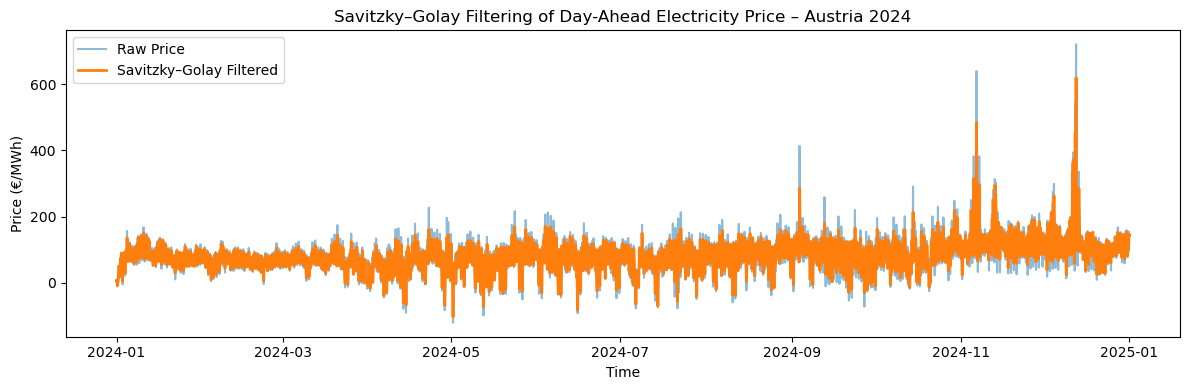

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter

# =================================================
# 1) LOAD DATA
# =================================================
df = pd.read_csv("price_AT_2024.csv")

# Clean column names
df.columns = df.columns.str.strip()

# =================================================
# 2) DETECT TIME (MTU) COLUMN
# =================================================
time_cols = [c for c in df.columns if "mtu" in c.lower()]
if len(time_cols) == 0:
    raise ValueError("No MTU column found in price file.")

time_col = time_cols[0]

# Parse start time only
df["Time"] = pd.to_datetime(
    df[time_col].astype(str).str.split(" - ").str[0],
    dayfirst=True,
    errors="coerce"
)

df = df.dropna(subset=["Time"])

# =================================================
# 3) FILTER AUSTRIA (IF AREA EXISTS)
# =================================================
if "Area" in df.columns:
    df = df[df["Area"].str.contains("AT", case=False, na=False)]

# =================================================
# 4) DETECT PRICE COLUMN ROBUSTLY
# =================================================
price_candidates = [c for c in df.columns if "price" in c.lower()]
if len(price_candidates) == 0:
    raise ValueError("No price column found in price file.")

# Prefer columns containing EUR
eur_candidates = [c for c in price_candidates if "eur" in c.lower()]
price_col = eur_candidates[0] if len(eur_candidates) > 0 else price_candidates[0]

df["Price"] = pd.to_numeric(
    df[price_col].astype(str).str.replace(",", "."),
    errors="coerce"
)

df = df.dropna(subset=["Price"])

# =================================================
# 5) BUILD HOURLY PRICE TIME SERIES
# (AVERAGE ACROSS SEQUENCES IF NEEDED)
# =================================================
price_ts = (
    df
    .sort_values("Time")
    .set_index("Time")
    .groupby("Time")["Price"]
    .mean()
    .asfreq("H")
)

# =================================================
# 6) SAVITZKY–GOLAY FILTER (SAFE)
# =================================================
WINDOW = 9      # odd number, ~9 hours smoothing
POLY   = 3

if len(price_ts.dropna()) >= WINDOW:
    sg_values = savgol_filter(
        price_ts.values,
        window_length=WINDOW,
        polyorder=POLY
    )
else:
    sg_values = price_ts.values

price_sg = pd.Series(sg_values, index=price_ts.index)

# =================================================
# 7) PLOT
# =================================================
plt.figure(figsize=(12,4))
plt.plot(price_ts, label="Raw Price", alpha=0.5)
plt.plot(price_sg, label="Savitzky–Golay Filtered", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Price (€/MWh)")
plt.title("Savitzky–Golay Filtering of Day-Ahead Electricity Price – Austria 2024")
plt.legend()
plt.tight_layout()
plt.show()


Outlier detection combining spike detection and a rolling Z-score

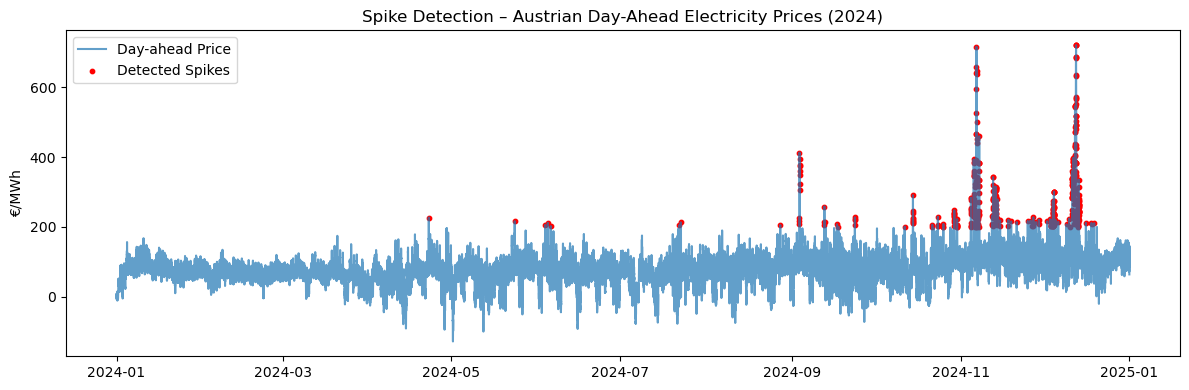

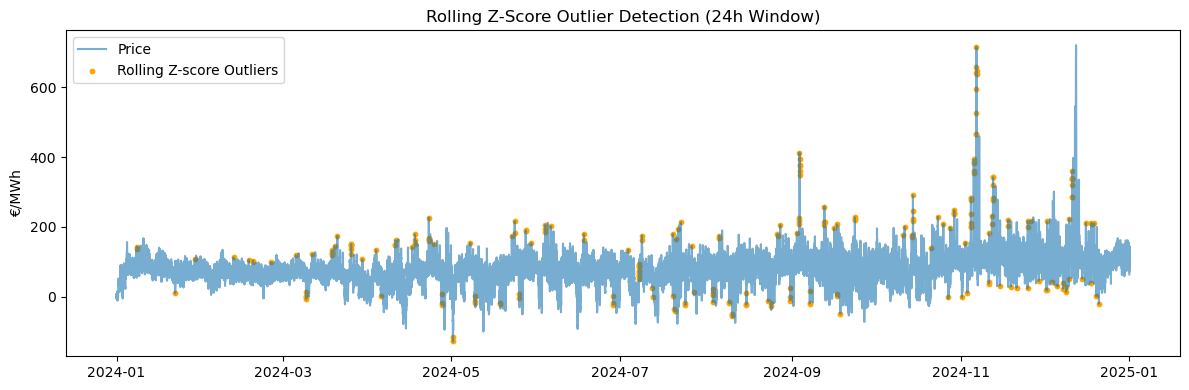

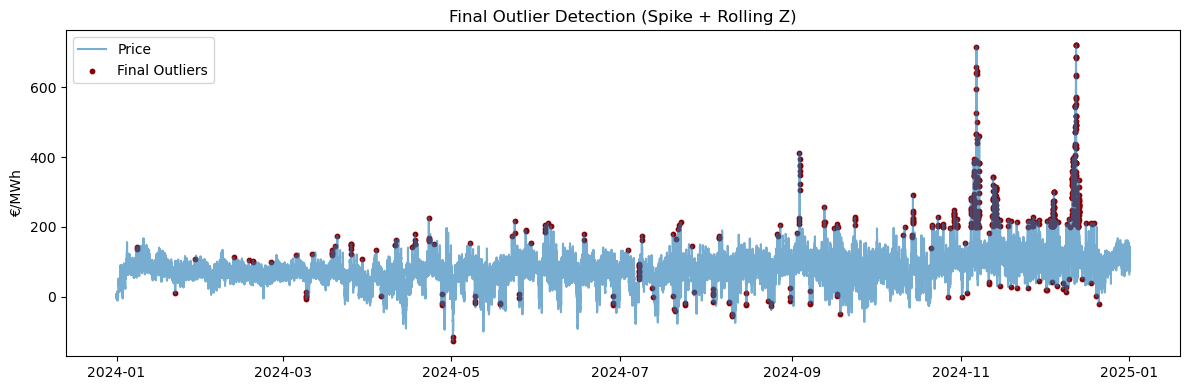

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =================================================
# 1) LOAD DATA
# =================================================
df = pd.read_csv("price_AT_2024.csv")

# Clean column names
df.columns = df.columns.str.strip()

# =================================================
# 2) SELECT REQUIRED COLUMNS (ROBUST)
# =================================================
required_cols = [
    "MTU (CET/CEST)",
    "Area",
    "Sequence",
    "Day-ahead Price (EUR/MWh)"
]

missing = [c for c in required_cols if c not in df.columns]
if missing:
    raise ValueError(f"Missing required columns: {missing}")

df = df[required_cols].rename(columns={
    "MTU (CET/CEST)": "MTU",
    "Day-ahead Price (EUR/MWh)": "Price"
})

# =================================================
# 3) PARSE TIME (REMOVE CET/CEST TEXT)
# =================================================
df["Time"] = (
    df["MTU"]
    .astype(str)
    .str.split(" - ").str[0]
    .str.replace(r"\s*\(.*\)", "", regex=True)
)

df["Time"] = pd.to_datetime(
    df["Time"],
    dayfirst=True,
    errors="coerce"
)

df = df.dropna(subset=["Time"])

# =================================================
# 4) FILTER AUSTRIA & CLEAN PRICE
# =================================================
df = df[df["Area"] == "BZN|AT"]

df["Price"] = pd.to_numeric(
    df["Price"].astype(str).str.replace(",", "."),
    errors="coerce"
)

df = df.dropna(subset=["Price"])
df = df.sort_values("Time")

# =================================================
# 5) AGGREGATE SEQUENCES (MEAN PER TIMESTAMP)
# =================================================
df = (
    df
    .groupby("Time", as_index=False)["Price"]
    .mean()
    .set_index("Time")
)

# Optional: enforce 15-minute frequency (expected for day-ahead data)
df = df.asfreq("15min")

# =================================================
# 6) SPIKE DETECTION – ABSOLUTE + QUANTILE
# =================================================
ABS_SPIKE_THRESHOLD = 200  # €/MWh
df["Spike_abs"] = df["Price"].abs() > ABS_SPIKE_THRESHOLD

QUANTILE_LEVEL = 0.995
quantile_thr = df["Price"].quantile(QUANTILE_LEVEL)
df["Spike_quantile"] = df["Price"] > quantile_thr

df["Spike_flag"] = df["Spike_abs"] | df["Spike_quantile"]

# =================================================
# 7) ROLLING Z-SCORE OUTLIERS (24h WINDOW)
# =================================================
WINDOW = 96        # 96 × 15 min = 24 hours
Z_THRESHOLD = 3.0

rolling_mean = df["Price"].rolling(WINDOW, min_periods=WINDOW).mean()
rolling_std  = df["Price"].rolling(WINDOW, min_periods=WINDOW).std()

df["Rolling_Z"] = (df["Price"] - rolling_mean) / rolling_std
df["Z_outlier"] = df["Rolling_Z"].abs() > Z_THRESHOLD

# =================================================
# 8) FINAL OUTLIER FLAG
# =================================================
df["Outlier_final"] = df["Spike_flag"] | df["Z_outlier"]

# =================================================
# 9) VISUALIZATION
# =================================================

# --- Spike detection (absolute + quantile)
plt.figure(figsize=(12,4))
plt.plot(df.index, df["Price"], label="Day-ahead Price", alpha=0.7)
plt.scatter(
    df.index[df["Spike_flag"]],
    df.loc[df["Spike_flag"], "Price"],
    color="red",
    s=10,
    label="Detected Spikes"
)
plt.ylabel("€/MWh")
plt.title("Spike Detection – Austrian Day-Ahead Electricity Prices (2024)")
plt.legend()
plt.tight_layout()
plt.show()

# --- Rolling Z-score outliers
plt.figure(figsize=(12,4))
plt.plot(df.index, df["Price"], label="Price", alpha=0.6)
plt.scatter(
    df.index[df["Z_outlier"]],
    df.loc[df["Z_outlier"], "Price"],
    color="orange",
    s=10,
    label="Rolling Z-score Outliers"
)
plt.ylabel("€/MWh")
plt.title("Rolling Z-Score Outlier Detection (24h Window)")
plt.legend()
plt.tight_layout()
plt.show()

# --- Final combined outliers
plt.figure(figsize=(12,4))
plt.plot(df.index, df["Price"], label="Price", alpha=0.6)
plt.scatter(
    df.index[df["Outlier_final"]],
    df.loc[df["Outlier_final"], "Price"],
    color="darkred",
    s=10,
    label="Final Outliers"
)
plt.ylabel("€/MWh")
plt.title("Final Outlier Detection (Spike + Rolling Z)")
plt.legend()
plt.tight_layout()
plt.show()


Hourly net cross-border electricity flows with a 24-hour moving average and a 168-hour (weekly) moving average 

C:\Users\mehrd\AppData\Local\Temp\ipykernel_29972\3873997862.py:105: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



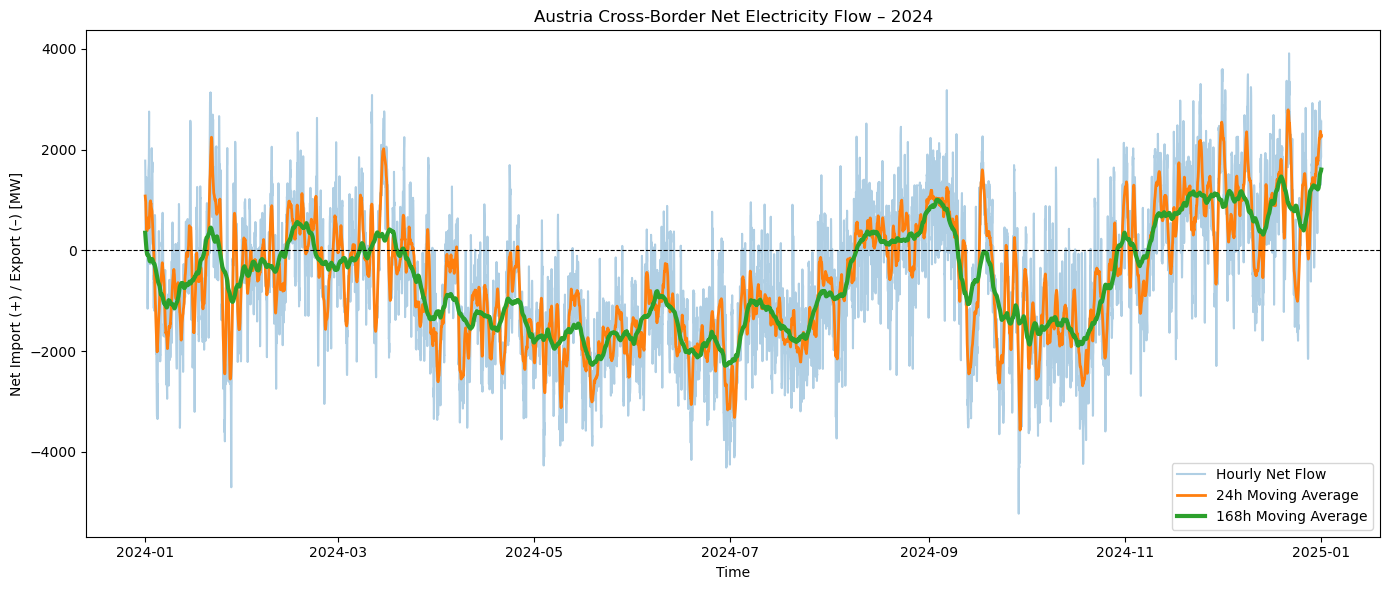

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# =================================================
# 1) LOAD DATA (robust separator & encoding)
# =================================================
df = pd.read_csv(
    "AT_crossborder_2024.csv",
    sep=None,
    engine="python",
    encoding="utf-8-sig"
)

df.columns = df.columns.str.strip()

# =================================================
# 2) DETECT REQUIRED COLUMNS (robust)
# =================================================
def find_col(possible_names, columns):
    cols_lower = {c.lower(): c for c in columns}
    for name in possible_names:
        if name.lower() in cols_lower:
            return cols_lower[name.lower()]
    return None

time_col = find_col(["MTU", "MTU (CET/CEST)", "Time", "time"], df.columns)
out_col  = find_col(["Out Area", "Out_Area", "OutArea"], df.columns)
in_col   = find_col(["In Area", "In_Area", "InArea"], df.columns)
flow_col = find_col(["Physical Flow (MW)", "Flow_MW", "Physical Flow", "Flow"], df.columns)

# fallback for time: first column
if time_col is None:
    time_col = df.columns[0]

missing = [name for name, col in [
    ("Out Area", out_col),
    ("In Area", in_col),
    ("Physical Flow (MW)", flow_col)
] if col is None]

if missing:
    raise ValueError(f"Missing required columns (or unexpected headers): {missing}")

# =================================================
# 3) PARSE TIME (start of MTU interval)
# =================================================
df["Start"] = pd.to_datetime(
    df[time_col].astype(str).str.split(" - ").str[0].str.strip(),
    dayfirst=True,
    errors="coerce"
)

df = df.dropna(subset=["Start"])

# =================================================
# 4) CLEAN FLOW TO NUMERIC
# =================================================
df[flow_col] = pd.to_numeric(
    df[flow_col].astype(str).str.replace(",", "."),
    errors="coerce"
)
df = df.dropna(subset=[flow_col])

# Ensure text columns are strings
df[out_col] = df[out_col].astype(str)
df[in_col]  = df[in_col].astype(str)

# =================================================
# 5) KEEP AUSTRIA-RELATED FLOWS
# =================================================
mask_at = (
    df[out_col].str.contains("Austria", case=False, na=False) |
    df[in_col].str.contains("Austria", case=False, na=False)
)
df_at = df[mask_at].copy()

# =================================================
# 6) VECTORIZED NET FLOW SIGN CONVENTION
# Import  -> + MW (Austria in In_Area)
# Export  -> - MW (Austria in Out_Area)
# =================================================
df_at["NetFlow_AT_MW"] = np.nan

imp_mask = df_at[in_col].str.contains("Austria", case=False, na=False)
exp_mask = df_at[out_col].str.contains("Austria", case=False, na=False)

df_at.loc[imp_mask, "NetFlow_AT_MW"] = df_at.loc[imp_mask, flow_col]
df_at.loc[exp_mask, "NetFlow_AT_MW"] = -df_at.loc[exp_mask, flow_col]

df_at = df_at.dropna(subset=["NetFlow_AT_MW"])

# =================================================
# 7) AGGREGATE TO HOURLY NET FLOW
# =================================================
net_flow_hourly = (
    df_at
    .groupby("Start", as_index=True)["NetFlow_AT_MW"]
    .sum()
    .sort_index()
    .to_frame()
)

# enforce hourly timeline + fill gaps with 0 (no recorded flow)
net_flow_hourly = net_flow_hourly.asfreq("H")
net_flow_hourly["NetFlow_AT_MW"] = net_flow_hourly["NetFlow_AT_MW"].fillna(0)

# =================================================
# 8) MOVING AVERAGES (STRUCTURAL SMOOTHING)
# =================================================
net_flow_hourly["MA_24h"] = (
    net_flow_hourly["NetFlow_AT_MW"]
    .rolling(window=24, center=True, min_periods=12)
    .mean()
)

net_flow_hourly["MA_168h"] = (
    net_flow_hourly["NetFlow_AT_MW"]
    .rolling(window=168, center=True, min_periods=84)
    .mean()
)

# =================================================
# 9) PLOT
# =================================================
plt.figure(figsize=(14, 6))

plt.plot(
    net_flow_hourly.index,
    net_flow_hourly["NetFlow_AT_MW"],
    label="Hourly Net Flow",
    alpha=0.35
)

plt.plot(
    net_flow_hourly.index,
    net_flow_hourly["MA_24h"],
    linewidth=2,
    label="24h Moving Average"
)

plt.plot(
    net_flow_hourly.index,
    net_flow_hourly["MA_168h"],
    linewidth=3,
    label="168h Moving Average"
)

plt.axhline(0, color="black", linestyle="--", linewidth=0.8)

plt.title("Austria Cross-Border Net Electricity Flow – 2024")
plt.xlabel("Time")
plt.ylabel("Net Import (+) / Export (–) [MW]")
plt.legend()
plt.tight_layout()
plt.show()


The boxplot of day-ahead electricity price distributions by RES share 

The correlation matrix of prices, demand, renewable penetration, cross-border trade, and temporal persistence

C:\Users\mehrd\AppData\Local\Temp\ipykernel_29972\3966731664.py:139: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



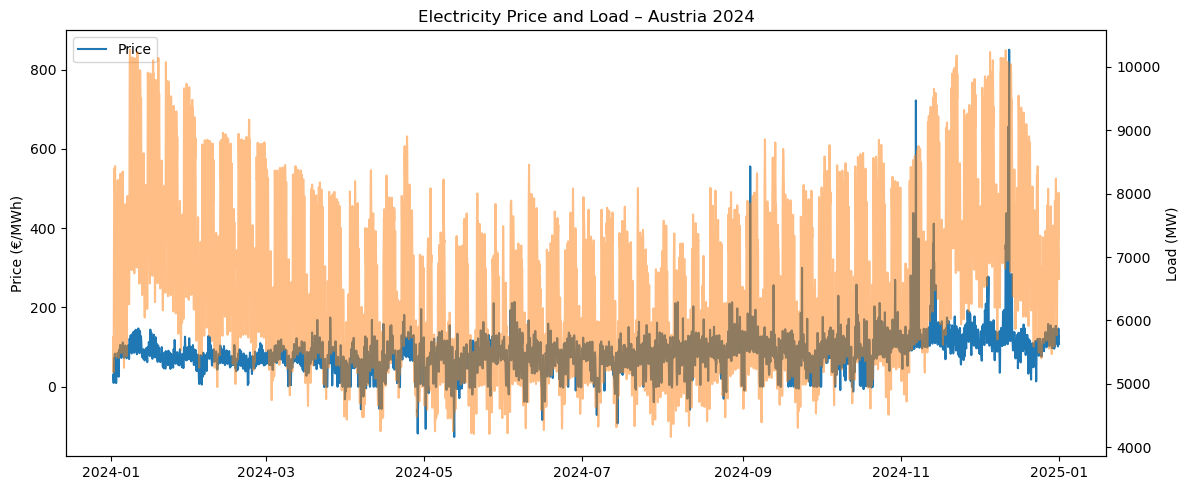

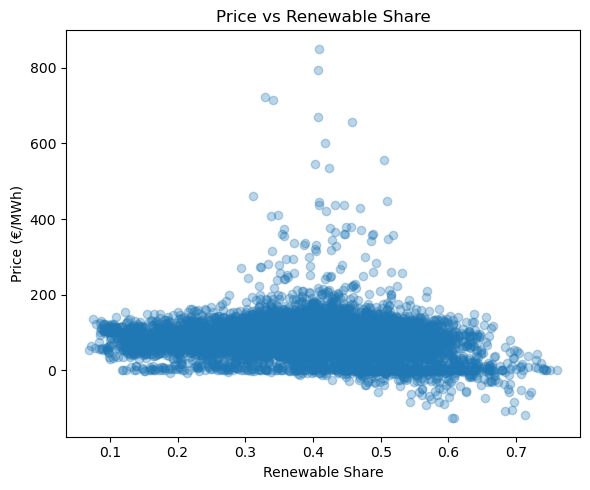

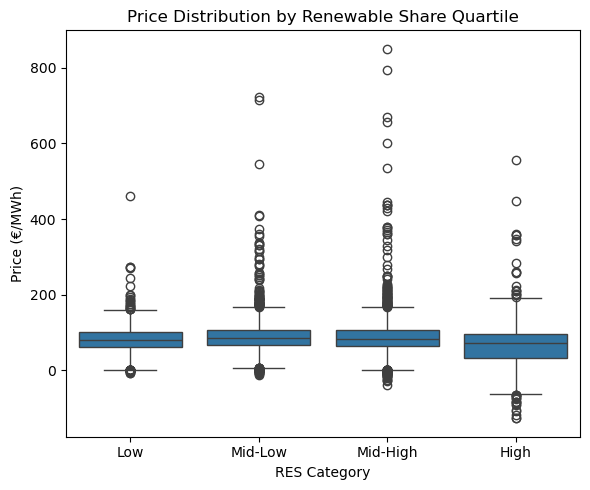

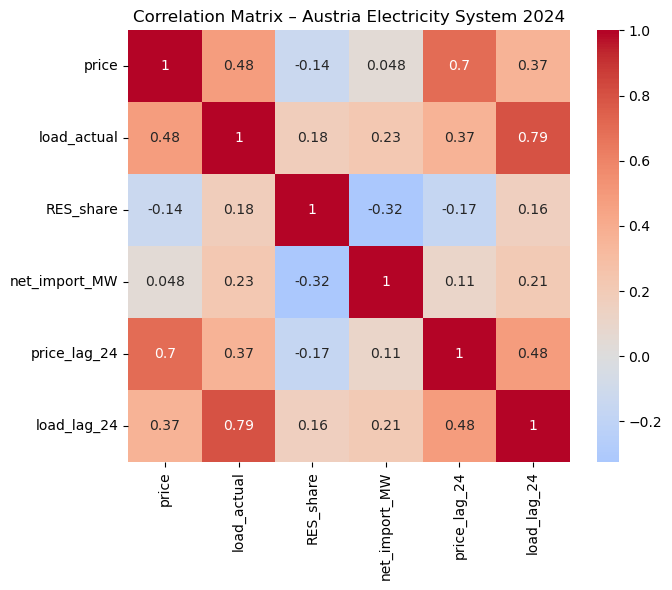

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# =================================================
# PARSE FUNCTION
# =================================================
def parse_start(series):
    return pd.to_datetime(
        series.astype(str).str.split(" - ").str[0],
        dayfirst=True,
        errors="coerce"
    )


# =================================================
# LOAD RAW DATA
# =================================================
price_df = pd.read_csv("price_AT_2024.csv")
load_df  = pd.read_csv("load_AT_2024.csv")
gen_df   = pd.read_csv("generation_AT_2024.csv")
flow_df  = pd.read_csv("AT_crossborder_2024.csv")


# =================================================
# 1) PRICE (SDAC)
# =================================================
price_df.columns = price_df.columns.str.strip()
price_df["Start"] = parse_start(price_df["MTU (CET/CEST)"])

price_df = price_df[
    (price_df["Area"].str.contains("AT|BZN\\|AT", na=False, case=False)) &
    (price_df["Sequence"].str.contains("sdac|sequence 1", na=False, case=False))
]

price_df["price"] = pd.to_numeric(
    price_df["Day-ahead Price (EUR/MWh)"].astype(str).str.replace(",", "."),
    errors="coerce"
)

price_ts = (
    price_df.dropna(subset=["Start", "price"])
            .groupby("Start")["price"]
            .mean()
)


# =================================================
# 2) LOAD
# =================================================
load_df["Start"] = parse_start(load_df["MTU (CET/CEST)"])

load_df["load_actual"] = pd.to_numeric(
    load_df["Actual Total Load (MW)"].astype(str).str.replace(",", "."),
    errors="coerce"
)

load_ts = (
    load_df.dropna(subset=["Start", "load_actual"])
           .set_index("Start")["load_actual"]
)


# =================================================
# 3) RENEWABLE SHARE
# =================================================
gen_df["Start"] = parse_start(gen_df["MTU (CET/CEST)"])
gen_df["Generation_MW"] = pd.to_numeric(
    gen_df["Generation (MW)"].astype(str).str.replace(",", "."),
    errors="coerce"
)

renewables = [
    "Solar",
    "Wind Onshore",
    "Hydro Run-of-river and pondage",
    "Hydro Water Reservoir",
    "Hydro Pumped Storage",
    "Biomass",
    "Geothermal"
]

gen_clean = gen_df.dropna(subset=["Start", "Generation_MW"])

total_gen = (
    gen_clean.groupby("Start")["Generation_MW"]
             .sum()
)

res_gen = (
    gen_clean[gen_clean["Production Type"].isin(renewables)]
              .groupby("Start")["Generation_MW"]
              .sum()
)

RES_share = (res_gen / total_gen).rename("RES_share")


# =================================================
# 4) NET IMPORT (AUSTRIA)
# =================================================
flow_df = flow_df.copy()
flow_df.columns = flow_df.columns.str.strip()
flow_df["Start"] = parse_start(flow_df["MTU"])

flow_df["Physical Flow (MW)"] = pd.to_numeric(
    flow_df["Physical Flow (MW)"],
    errors="coerce"
)

flow_df = flow_df.dropna(subset=["Start", "Physical Flow (MW)"])

# correct regex for Austria bidding zone AT
pattern = r"\bAT\b"

imports = flow_df[flow_df["In Area"].str.contains(pattern, na=False, case=False)].copy()
exports = flow_df[flow_df["Out Area"].str.contains(pattern, na=False, case=False)].copy()

imports["net_import_MW"] = imports["Physical Flow (MW)"]
exports["net_import_MW"] = -exports["Physical Flow (MW)"]

net_import = (
    pd.concat([imports, exports])
      .groupby("Start")["net_import_MW"]
      .sum()
)


# =================================================
# 5) MERGE EVERYTHING
# =================================================
df = pd.concat(
    [price_ts, load_ts, RES_share, net_import],
    axis=1
).sort_index().dropna()

# Hourly frequency alignment
df = df.asfreq("H").ffill()


# =================================================
# 6) FEATURE ENGINEERING
# =================================================
df["hour"]      = df.index.hour
df["dayofweek"] = df.index.dayofweek
df["month"]     = df.index.month

df["price_lag_24"] = df["price"].shift(24)
df["load_lag_24"]  = df["load_actual"].shift(24)

df["price_roll_mean_24"] = df["price"].rolling(24).mean()
df["price_roll_std_24"]  = df["price"].rolling(24).std()

df = df.dropna()


# =================================================
# 7) PLOT – PRICE & LOAD
# =================================================
fig, ax1 = plt.subplots(figsize=(12,5))
ax1.plot(df.index, df["price"], label="Price", color="tab:blue")
ax1.set_ylabel("Price (€/MWh)")

ax2 = ax1.twinx()
ax2.plot(df.index, df["load_actual"], label="Load", color="tab:orange", alpha=0.5)
ax2.set_ylabel("Load (MW)")

ax1.legend(loc="upper left")
plt.title("Electricity Price and Load – Austria 2024")
plt.tight_layout()
plt.show()


# =================================================
# 8) SCATTER – PRICE vs RES SHARE
# =================================================
plt.figure(figsize=(6,5))
plt.scatter(df["RES_share"], df["price"], alpha=0.3)
plt.xlabel("Renewable Share")
plt.ylabel("Price (€/MWh)")
plt.title("Price vs Renewable Share")
plt.tight_layout()
plt.show()


# =================================================
# 9) BOXPLOT – PRICE BY RES QUARTILES
# =================================================
df["RES_bin"] = pd.qcut(df["RES_share"], 4,
                        labels=["Low", "Mid-Low", "Mid-High", "High"],
                        duplicates="drop")

plt.figure(figsize=(6,5))
sns.boxplot(x="RES_bin", y="price", data=df)
plt.title("Price Distribution by Renewable Share Quartile")
plt.xlabel("RES Category")
plt.ylabel("Price (€/MWh)")
plt.tight_layout()
plt.show()


# =================================================
# 10) CORRELATION MATRIX
# =================================================
features = [
    "price", "load_actual", "RES_share", "net_import_MW",
    "price_lag_24", "load_lag_24"
]

corr = df[features].corr()

plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix – Austria Electricity System 2024")
plt.tight_layout()
plt.show()


Day-ahead electricity prices with forecasts produced by three different models: SARIMA, SARIMAX, and GBR

C:\Users\mehrd\AppData\Local\Temp\ipykernel_29972\2308358470.py:48: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\mehrd\AppData\Local\Temp\ipykernel_29972\2308358470.py:82: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\mehrd\AppData\Local\Temp\ipykernel_29972\2308358470.py:88: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

c:\Users\mehrd\anaconda3\envs\SES2025\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\mehrd\anaconda3\envs\SES2025\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.



Dataset shape: (8759, 12)
Train size: 7007 | Test size: 1752


c:\Users\mehrd\anaconda3\envs\SES2025\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\mehrd\anaconda3\envs\SES2025\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



SARIMA  | RMSE: 82.00 | MAE: 53.89


c:\Users\mehrd\anaconda3\envs\SES2025\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\mehrd\anaconda3\envs\SES2025\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

c:\Users\mehrd\anaconda3\envs\SES2025\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

c:\Users\mehrd\anaconda3\envs\SES2025\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



SARIMAX | RMSE: 62.31 | MAE: 33.45
GBR     | RMSE: 34.42 | MAE: 13.40


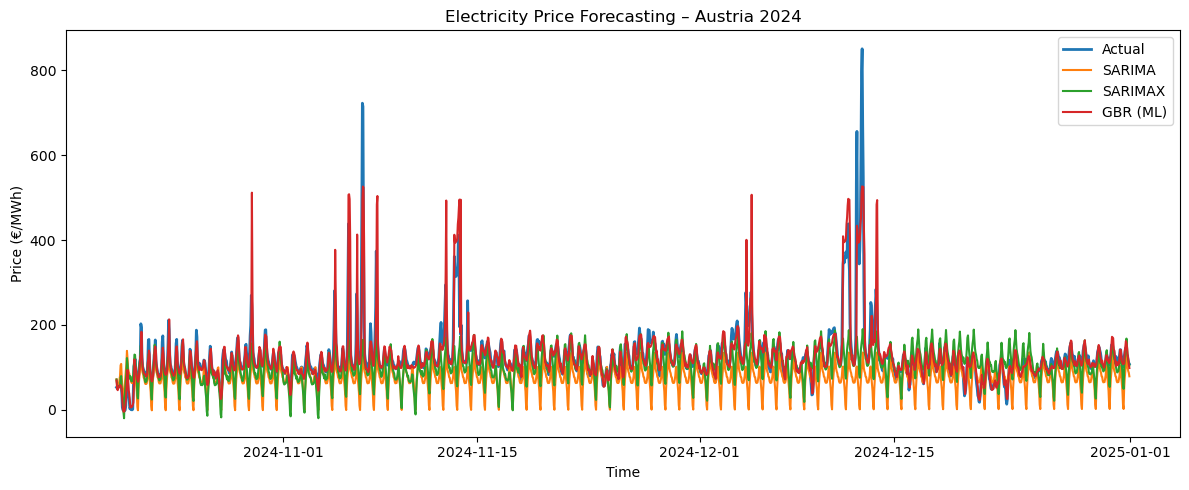

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor


# =================================================
# Helpers
# =================================================
def parse_mtu_start(series: pd.Series) -> pd.DatetimeIndex:
    start = series.astype(str).str.split(" - ").str[0].str.strip()
    start = start.str.replace(r"\s*\(.*?\)", "", regex=True)
    return pd.to_datetime(start, dayfirst=True, errors="coerce")


def rmse(y_true, y_pred) -> float:
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))


# =================================================
# LOAD & CLEAN LOAD DATA
# =================================================
load_df = pd.read_csv("load_AT_2024.csv")
load_df.columns = load_df.columns.str.strip()

LOAD_TIME = "MTU (CET/CEST)"
LOAD_ACT  = "Actual Total Load (MW)"
LOAD_FCST = "Day-ahead Total Load Forecast (MW)"

load_df["Start"] = parse_mtu_start(load_df[LOAD_TIME])
load_df = load_df.dropna(subset=["Start"])

load_df["load_actual"] = pd.to_numeric(
    load_df[LOAD_ACT].astype(str).str.replace(",", "."),
    errors="coerce"
)
load_df["load_forecast"] = pd.to_numeric(
    load_df[LOAD_FCST].astype(str).str.replace(",", "."),
    errors="coerce"
)
load_df = load_df.dropna(subset=["load_actual", "load_forecast"])

load_hourly = (
    load_df.set_index("Start")[["load_actual", "load_forecast"]]
    .resample("H")
    .mean()
)

# =================================================
# LOAD & CLEAN PRICE DATA
# =================================================
price_df = pd.read_csv("price_AT_2024.csv")
price_df.columns = price_df.columns.str.strip()

PRICE_TIME = "MTU (CET/CEST)"
PRICE_COL  = "Day-ahead Price (EUR/MWh)"
PRICE_AREA = "Area"
PRICE_SEQ  = "Sequence"

price_df["Start"] = parse_mtu_start(price_df[PRICE_TIME])
price_df = price_df.dropna(subset=["Start"])

if PRICE_AREA in price_df.columns:
    price_df = price_df[
        price_df[PRICE_AREA].astype(str).str.contains("AT|BZN\\|AT", case=False, na=False)
    ]

if PRICE_SEQ in price_df.columns:
    price_df = price_df[
        price_df[PRICE_SEQ].astype(str).str.contains("sdac|sequence 1", case=False, na=False)
    ]

price_df["price"] = pd.to_numeric(
    price_df[PRICE_COL].astype(str).str.replace(",", "."),
    errors="coerce"
)
price_df = price_df.dropna(subset=["price"])

price_hourly = price_df.set_index("Start")[["price"]].resample("H").mean()

# =================================================
# MERGE DATA
# =================================================
df = price_hourly.join(load_hourly, how="inner").dropna()
df = df.asfreq("H").dropna()


# =================================================
# FEATURE ENGINEERING
# =================================================
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek
df["month"] = df.index.month

df["price_lag_1"] = df["price"].shift(1)
df["price_lag_24"] = df["price"].shift(24)
df["load_lag_1"] = df["load_actual"].shift(1)
df["load_lag_24"] = df["load_actual"].shift(24)

df["price_roll_mean_24"] = df["price"].rolling(24).mean()
df["price_roll_std_24"] = df["price"].rolling(24).std()

df = df.dropna()


# =================================================
# TRAIN / TEST SPLIT
# =================================================
target = df["price"]

# Simplified exogenous → فقط load_forecast
exog = df[["load_forecast"]]

split_idx = int(0.8 * len(df))

train_y = target.iloc[:split_idx]
test_y = target.iloc[split_idx:]

train_exog = exog.iloc[:split_idx]
test_exog = exog.iloc[split_idx:]

features = df[[
    "hour","dayofweek","month",
    "load_actual","load_forecast",
    "price_lag_1","price_lag_24",
    "load_lag_1","load_lag_24",
    "price_roll_mean_24","price_roll_std_24"
]]

X_train = features.iloc[:split_idx]
X_test = features.iloc[split_idx:]

y_train = train_y
y_test  = test_y


print("Dataset shape:", df.shape)
print("Train size:", len(train_y), "| Test size:", len(test_y))


# =================================================
# MODEL 1: SARIMA (baseline)
# =================================================
sarima = SARIMAX(
    train_y,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 0, 24),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarima_fit = sarima.fit(disp=False, maxiter=40, method="lbfgs")
sarima_pred = sarima_fit.forecast(steps=len(test_y))

sarima_rmse = rmse(test_y, sarima_pred)
sarima_mae = mean_absolute_error(test_y, sarima_pred)

print(f"SARIMA  | RMSE: {sarima_rmse:.2f} | MAE: {sarima_mae:.2f}")


# =================================================
# MODEL 2: SARIMAX (fast exogenous)
# =================================================
sarimax = SARIMAX(
    train_y,
    exog=train_exog,
    order=(1, 1, 1),
    seasonal_order=(1, 1, 0, 24),
    enforce_stationarity=False,
    enforce_invertibility=False
)

sarimax_fit = sarimax.fit(disp=False, maxiter=40, method="lbfgs")
sarimax_pred = sarimax_fit.forecast(steps=len(test_y), exog=test_exog)

sarimax_rmse = rmse(test_y, sarimax_pred)
sarimax_mae = mean_absolute_error(test_y, sarimax_pred)

print(f"SARIMAX | RMSE: {sarimax_rmse:.2f} | MAE: {sarimax_mae:.2f}")


# =================================================
# MODEL 3: Gradient Boosting (ML)
# =================================================
gbr = GradientBoostingRegressor(random_state=42)
gbr.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

gbr_rmse = rmse(y_test, gbr_pred)
gbr_mae = mean_absolute_error(y_test, gbr_pred)

print(f"GBR     | RMSE: {gbr_rmse:.2f} | MAE: {gbr_mae:.2f}")


# =================================================
# PLOT
# =================================================
plt.figure(figsize=(12, 5))
plt.plot(test_y.index, test_y.values, label="Actual", linewidth=2)
plt.plot(test_y.index, sarima_pred.values, label="SARIMA")
plt.plot(test_y.index, sarimax_pred.values, label="SARIMAX")
plt.plot(test_y.index, gbr_pred, label="GBR (ML)")

plt.title("Electricity Price Forecasting – Austria 2024")
plt.xlabel("Time")
plt.ylabel("Price (€/MWh)")
plt.legend()
plt.tight_layout()
plt.show()


GBR model specifically

Forecasts produced by GBR model: Day-ahead electricity prices in last two weeks b) Actual and total load

C:\Users\mehrd\AppData\Local\Temp\ipykernel_29972\2215111867.py:53: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\mehrd\AppData\Local\Temp\ipykernel_29972\2215111867.py:78: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\mehrd\AppData\Local\Temp\ipykernel_29972\2215111867.py:113: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\mehrd\AppData\Local\Temp\ipykernel_29972\2215111867.py:142: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\mehrd\AppData\Local\Temp\ipykernel_29972\2215111867.py:146: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\mehrd\AppData\Local\Temp\ipykernel_29972\2215111867.py:159: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h

========== PRICE FORECASTING (GBR) ==========
RMSE: 35.73 €/MWh
MAE : 14.19 €/MWh



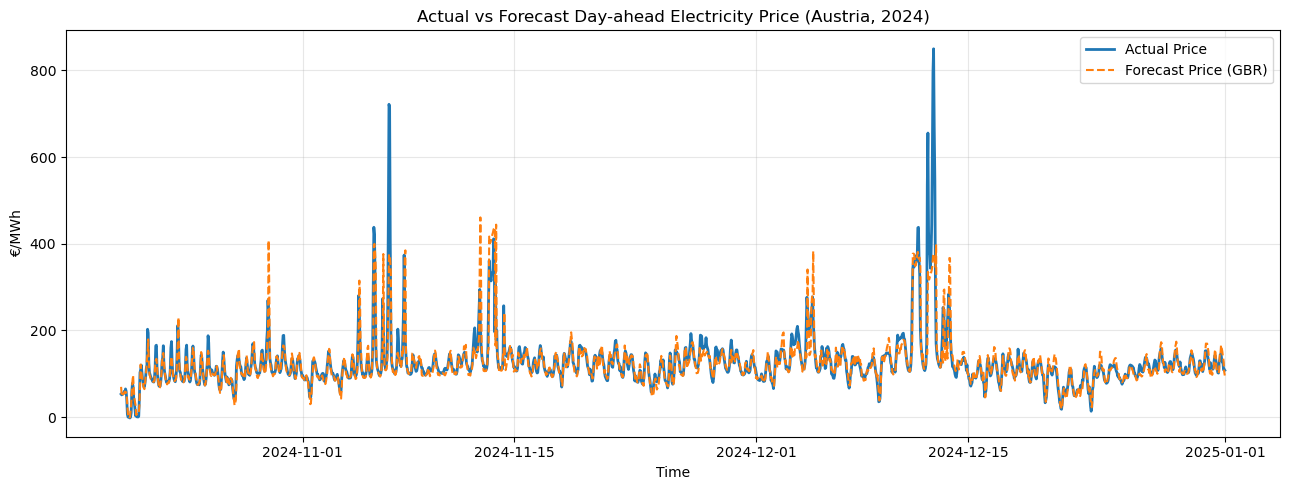

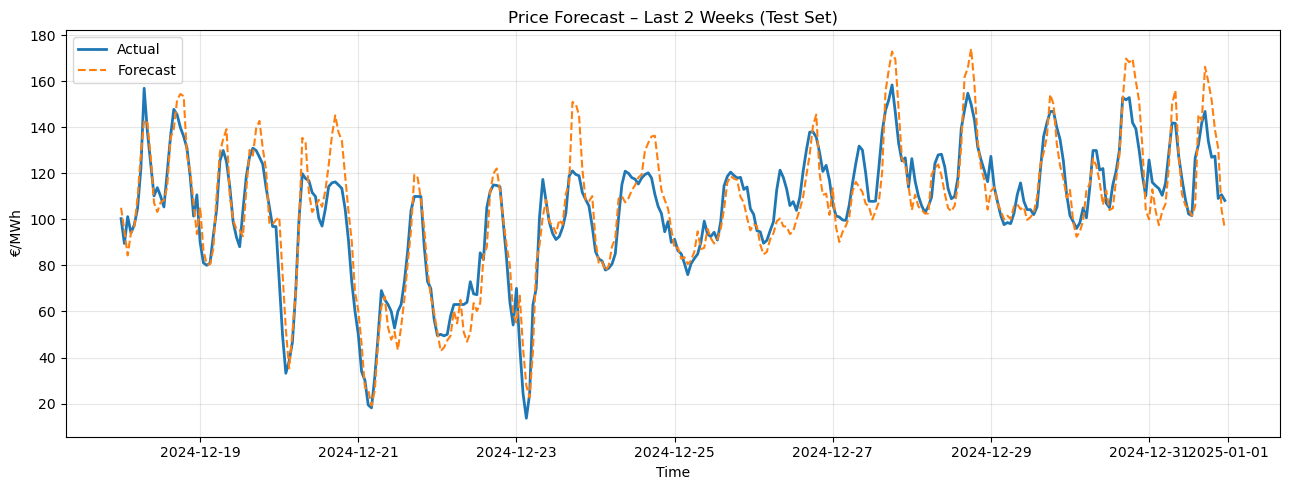

========== LOAD FORECASTING (GBR) ==========
RMSE: 203.06 MW
MAE : 158.90 MW



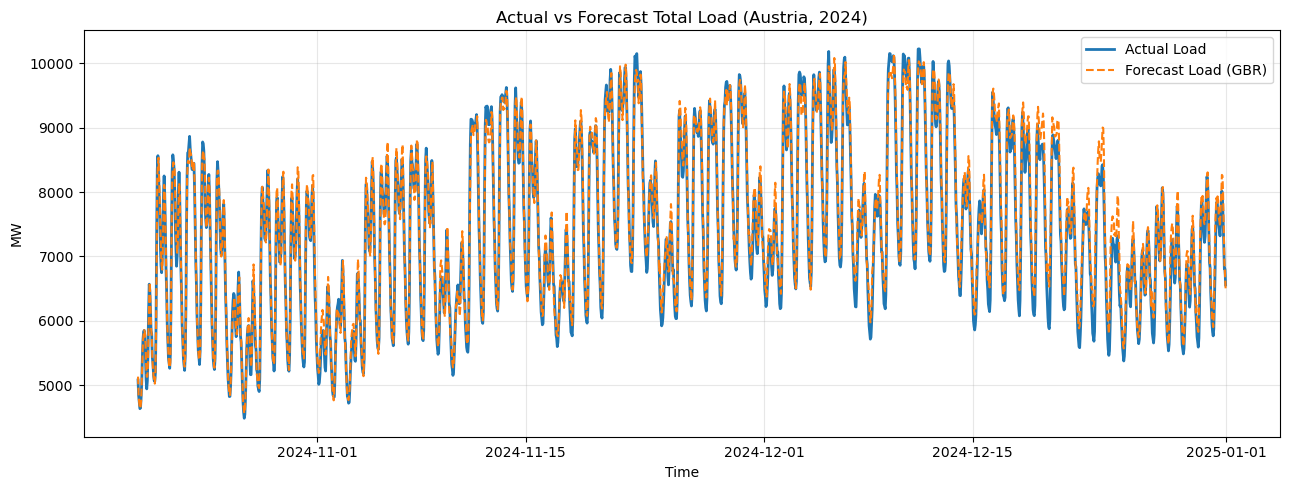

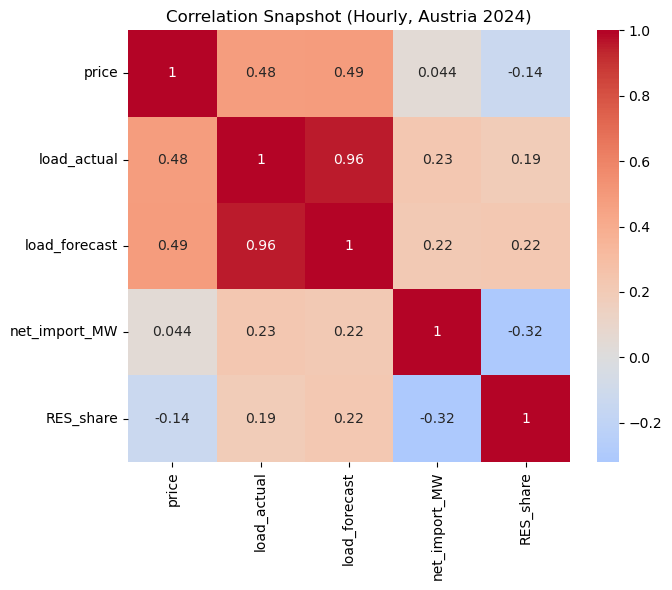

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

# =========================================================
# 0) Helpers
# =========================================================
def parse_mtu_start(series: pd.Series) -> pd.DatetimeIndex:
    """Extract 'start' timestamp from 'start - end' strings and parse."""
    s = series.astype(str).str.split(" - ").str[0].str.strip()
    s = s.str.replace(r"\s*\(.*?\)", "", regex=True)  # remove (CET)/(CEST) if present
    return pd.to_datetime(s, dayfirst=True, errors="coerce")

def rmse(y_true, y_pred) -> float:
    return float(np.sqrt(mean_squared_error(y_true, y_pred)))

def time_split(df: pd.DataFrame, test_frac: float = 0.2):
    split = int((1 - test_frac) * len(df))
    return df.iloc[:split], df.iloc[split:]


# =========================================================
# 1) LOAD PRICE (SDAC)  + PARSE
# =========================================================
price_df = pd.read_csv("price_AT_2024.csv")
price_df.columns = price_df.columns.str.strip()

price_df["Start"] = parse_mtu_start(price_df["MTU (CET/CEST)"])
price_df = price_df.dropna(subset=["Start"])

# Filter Austria zone if present
if "Area" in price_df.columns:
    price_df = price_df[price_df["Area"].astype(str).str.contains("BZN\\|AT|AT", case=False, na=False)]

# Filter SDAC if sequence exists
if "Sequence" in price_df.columns:
    seq = price_df["Sequence"].astype(str).str.lower()
    price_df = price_df[seq.str.contains("sdac|sequence 1", na=False)]

price_df["price"] = pd.to_numeric(
    price_df["Day-ahead Price (EUR/MWh)"].astype(str).str.replace(",", "."),
    errors="coerce"
)

price_ts = (
    price_df.dropna(subset=["price"])
    .groupby("Start")["price"]
    .mean()
    .resample("H")
    .mean()
)

# =========================================================
# 2) LOAD ACTUAL LOAD + FORECAST LOAD
# =========================================================
load_df = pd.read_csv("load_AT_2024.csv")
load_df.columns = load_df.columns.str.strip()

load_df["Start"] = parse_mtu_start(load_df["MTU (CET/CEST)"])
load_df = load_df.dropna(subset=["Start"])

load_df["load_actual"] = pd.to_numeric(
    load_df["Actual Total Load (MW)"].astype(str).str.replace(",", "."),
    errors="coerce"
)
load_df["load_forecast"] = pd.to_numeric(
    load_df["Day-ahead Total Load Forecast (MW)"].astype(str).str.replace(",", "."),
    errors="coerce"
)

load_ts = (
    load_df.dropna(subset=["load_actual", "load_forecast"])
    .set_index("Start")[["load_actual", "load_forecast"]]
    .resample("H")
    .mean()
)

# =========================================================
# 3) NET IMPORT (AUSTRIA) FROM CROSS-BORDER FLOWS
# =========================================================
flow_df = pd.read_csv("AT_crossborder_2024.csv")
flow_df.columns = flow_df.columns.str.strip()

# Handle common headers
# Expected: MTU | Out Area | In Area | Physical Flow (MW)
if "MTU" not in flow_df.columns:
    raise ValueError("Crossborder file must include 'MTU' column.")
if "Out Area" not in flow_df.columns or "In Area" not in flow_df.columns:
    raise ValueError("Crossborder file must include 'Out Area' and 'In Area'.")
if "Physical Flow (MW)" not in flow_df.columns:
    raise ValueError("Crossborder file must include 'Physical Flow (MW)'.")

flow_df["Start"] = parse_mtu_start(flow_df["MTU"])
flow_df = flow_df.dropna(subset=["Start"])

flow_df["Physical Flow (MW)"] = pd.to_numeric(flow_df["Physical Flow (MW)"], errors="coerce")
flow_df = flow_df.dropna(subset=["Physical Flow (MW)"])

imp = flow_df[flow_df["In Area"].astype(str).str.contains("Austria", case=False, na=False)].copy()
exp = flow_df[flow_df["Out Area"].astype(str).str.contains("Austria", case=False, na=False)].copy()

imp["net_import_MW"] = imp["Physical Flow (MW)"]
exp["net_import_MW"] = -exp["Physical Flow (MW)"]

net_import_ts = (
    pd.concat([imp, exp], ignore_index=True)
    .groupby("Start")["net_import_MW"]
    .sum()
    .resample("H")
    .mean()
)

# =========================================================
# 4) RES SHARE FROM GENERATION MIX (Solar+Wind+Hydro+Biomass+Geo)
# =========================================================
gen_df = pd.read_csv("generation_AT_2024.csv")
gen_df.columns = gen_df.columns.str.strip()

gen_df["Start"] = parse_mtu_start(gen_df["MTU (CET/CEST)"])
gen_df = gen_df.dropna(subset=["Start"])

gen_df["gen_MW"] = pd.to_numeric(
    gen_df["Generation (MW)"].astype(str).str.replace(",", "."),
    errors="coerce"
)
gen_df = gen_df.dropna(subset=["gen_MW"])

RENEWABLES = [
    "Solar",
    "Wind Onshore",
    "Hydro Run-of-river and pondage",
    "Hydro Water Reservoir",
    "Hydro Pumped Storage",
    "Biomass",
    "Geothermal",
]

total_gen = gen_df.groupby("Start")["gen_MW"].sum().resample("H").mean()
res_gen = (
    gen_df[gen_df["Production Type"].isin(RENEWABLES)]
    .groupby("Start")["gen_MW"].sum()
    .resample("H").mean()
)

res_share_ts = (res_gen / total_gen).rename("RES_share")

# =========================================================
# 5) BUILD MASTER DF (HOURLY)
# =========================================================
df = pd.concat(
    [price_ts, load_ts, net_import_ts, res_share_ts],
    axis=1
).dropna()

df = df.asfreq("H").dropna()

# Calendar features
df["hour"] = df.index.hour
df["dayofweek"] = df.index.dayofweek
df["month"] = df.index.month

# =========================================================
# 6) PART A — PRICE FORECASTING (GBR)
# =========================================================
df_price = df.copy()

# Lags & rolling
df_price["price_lag_1"] = df_price["price"].shift(1)
df_price["price_lag_24"] = df_price["price"].shift(24)
df_price["price_roll_mean_24"] = df_price["price"].rolling(24).mean()
df_price["price_roll_std_24"] = df_price["price"].rolling(24).std()

# Load lags (useful predictors)
df_price["load_lag_1"] = df_price["load_actual"].shift(1)
df_price["load_lag_24"] = df_price["load_actual"].shift(24)

df_price = df_price.dropna()

features_price = [
    "load_actual", "load_forecast",
    "net_import_MW", "RES_share",
    "hour", "dayofweek", "month",
    "price_lag_1", "price_lag_24",
    "load_lag_1", "load_lag_24",
    "price_roll_mean_24", "price_roll_std_24"
]

X_price = df_price[features_price]
y_price = df_price["price"]

train_p, test_p = time_split(df_price, test_frac=0.2)
X_train_p, y_train_p = train_p[features_price], train_p["price"]
X_test_p, y_test_p = test_p[features_price], test_p["price"]

gbr_price = GradientBoostingRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

gbr_price.fit(X_train_p, y_train_p)
y_pred_price = gbr_price.predict(X_test_p)

print("========== PRICE FORECASTING (GBR) ==========")
print(f"RMSE: {rmse(y_test_p, y_pred_price):.2f} €/MWh")
print(f"MAE : {mean_absolute_error(y_test_p, y_pred_price):.2f} €/MWh")
print()

# Plot full test
plt.figure(figsize=(13,5))
plt.plot(y_test_p.index, y_test_p.values, label="Actual Price", linewidth=2)
plt.plot(y_test_p.index, y_pred_price, "--", label="Forecast Price (GBR)")
plt.title("Actual vs Forecast Day-ahead Electricity Price (Austria, 2024)")
plt.ylabel("€/MWh")
plt.xlabel("Time")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Plot last 2 weeks
n_hours = 24 * 14
plt.figure(figsize=(13,5))
plt.plot(y_test_p.index[-n_hours:], y_test_p.values[-n_hours:], label="Actual", linewidth=2)
plt.plot(y_test_p.index[-n_hours:], y_pred_price[-n_hours:], "--", label="Forecast")
plt.title("Price Forecast – Last 2 Weeks (Test Set)")
plt.ylabel("€/MWh")
plt.xlabel("Time")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================
# 7) PART B — LOAD FORECASTING (GBR, NO PROXY)
# =========================================================
df_load = df.copy()

# Lags/rolling for load
df_load["load_lag_1"] = df_load["load_actual"].shift(1)
df_load["load_lag_24"] = df_load["load_actual"].shift(24)
df_load["load_roll_mean_24"] = df_load["load_actual"].rolling(24).mean()
df_load["load_roll_std_24"] = df_load["load_actual"].rolling(24).std()

# Optional: use price as predictor (can help, but is a choice)
df_load["price_lag_1"] = df_load["price"].shift(1)
df_load["price_lag_24"] = df_load["price"].shift(24)

df_load = df_load.dropna()

features_load = [
    "hour", "dayofweek", "month",
    "load_forecast",       # day-ahead load forecast is strong predictor
    "net_import_MW",
    "RES_share",
    "load_lag_1", "load_lag_24",
    "load_roll_mean_24", "load_roll_std_24",
    "price_lag_1", "price_lag_24"
]

X_load = df_load[features_load]
y_load = df_load["load_actual"]

train_l, test_l = time_split(df_load, test_frac=0.2)
X_train_l, y_train_l = train_l[features_load], train_l["load_actual"]
X_test_l, y_test_l = test_l[features_load], test_l["load_actual"]

gbr_load = GradientBoostingRegressor(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    random_state=42
)

gbr_load.fit(X_train_l, y_train_l)
y_pred_load = gbr_load.predict(X_test_l)

print("========== LOAD FORECASTING (GBR) ==========")
print(f"RMSE: {rmse(y_test_l, y_pred_load):.2f} MW")
print(f"MAE : {mean_absolute_error(y_test_l, y_pred_load):.2f} MW")
print()

plt.figure(figsize=(13,5))
plt.plot(y_test_l.index, y_test_l.values, label="Actual Load", linewidth=2)
plt.plot(y_test_l.index, y_pred_load, "--", label="Forecast Load (GBR)")
plt.title("Actual vs Forecast Total Load (Austria, 2024)")
plt.ylabel("MW")
plt.xlabel("Time")
plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# =========================================================
# 8) CORRELATION SNAPSHOT (OPTIONAL)
# =========================================================
plt.figure(figsize=(7,6))
sns.heatmap(df[["price","load_actual","load_forecast","net_import_MW","RES_share"]].corr(),
            annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Snapshot (Hourly, Austria 2024)")
plt.tight_layout()
plt.show()


PCA

In [25]:
# ======================================================
# AUSTRIA 2024 – PCA ONLY (GENERATION MIX)
# Clean, minimal, reproducible
# ======================================================

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# -----------------------------
# Utilities
# -----------------------------
def load_csv_safe(path: str) -> pd.DataFrame:
    try:
        df = pd.read_csv(path, sep=",", encoding="utf-8", low_memory=False)
        if df.shape[1] == 1:
            df = pd.read_csv(path, sep=";", encoding="utf-8", low_memory=False)
        return df
    except Exception:
        return pd.read_csv(path, sep=";", encoding="utf-8", low_memory=False)


def to_numeric_series(s: pd.Series) -> pd.Series:
    return pd.to_numeric(
        s.astype(str).str.replace(",", ".", regex=False).str.strip(),
        errors="coerce"
    )


def parse_mtu_start(series: pd.Series) -> pd.Series:
    s = series.astype(str).str.strip()
    a = s.str.extract(r"(^\d{2}/\d{2}/\d{4}\s\d{2}:\d{2}:\d{2})")[0]
    b = s.str.extract(r"(^\d{2}/\d{2}/\d{4}\s\d{2}:\d{2})")[0]
    out = a.fillna(b)
    out = out.fillna(s.str.split(" - ").str[0])
    return pd.to_datetime(out, format="mixed", dayfirst=True, errors="coerce")


def find_col(columns, must_include=None, any_of=None):
    cols = list(columns)
    cols_l = [c.lower() for c in cols]

    for i, c in enumerate(cols_l):
        if must_include and not all(m.lower() in c for m in must_include):
            continue
        if any_of and not any(a.lower() in c for a in any_of):
            continue
        return cols[i]
    return None


# ======================================================
# 1) LOAD GENERATION DATA
# ======================================================
gen_raw = load_csv_safe("generation_AT_2024.csv")
gen_raw.columns = gen_raw.columns.str.strip()

mtu_col = find_col(gen_raw.columns, any_of=["mtu"])
val_col = find_col(gen_raw.columns, must_include=["generation"], any_of=["mw"])
type_col = find_col(gen_raw.columns, must_include=["production"], any_of=["type"])

if mtu_col is None or val_col is None or type_col is None:
    raise ValueError("❌ Required columns not found in generation file.")

gen_raw["MTU_start"] = parse_mtu_start(gen_raw[mtu_col])
gen_raw[val_col] = to_numeric_series(gen_raw[val_col])

gen_raw = gen_raw.dropna(subset=["MTU_start", val_col])
gen_raw = gen_raw.set_index("MTU_start").sort_index()

# ======================================================
# 2) HOURLY GENERATION MIX MATRIX
# ======================================================
gen_hourly = (
    gen_raw
    .groupby([pd.Grouper(freq="H"), type_col])[val_col]
    .mean()
    .unstack()
)

techs = [
    "Solar",
    "Wind Onshore",
    "Hydro Run-of-river and pondage",
    "Hydro Water Reservoir",
    "Hydro Pumped Storage",
    "Fossil Gas",
]

gen_hourly = gen_hourly.reindex(columns=techs, fill_value=0)

# ======================================================
# 3) PCA
# ======================================================
X = StandardScaler().fit_transform(gen_hourly)

pca = PCA(n_components=3)
PC = pca.fit_transform(X)

pca_scores_df = pd.DataFrame(
    PC,
    index=gen_hourly.index,
    columns=["PC1", "PC2", "PC3"]
)

pca_loadings_df = pd.DataFrame(
    pca.components_.T,
    index=gen_hourly.columns,
    columns=["PC1", "PC2", "PC3"]
)

explained_variance_ratio = pca.explained_variance_ratio_

# ======================================================
# 4) OUTPUT
# ======================================================
print("Explained variance ratio:")
print(explained_variance_ratio)

print("\nPCA Loadings:")
print(pca_loadings_df)


Explained variance ratio:
[0.38802153 0.27471149 0.17971714]

PCA Loadings:
                                         PC1           PC2           PC3
Production Type                                                         
Solar                          -3.513391e-01 -5.521804e-01 -1.646760e-01
Wind Onshore                   -1.848842e-01  5.349363e-01  6.776442e-01
Hydro Run-of-river and pondage  1.110223e-16 -2.220446e-16 -1.387779e-16
Hydro Water Reservoir           6.087151e-01 -2.960508e-01  2.404377e-01
Hydro Pumped Storage            6.640174e-01 -2.183233e-02  5.925658e-02
Fossil Gas                      1.758564e-01  5.664072e-01 -6.725760e-01


C:\Users\mehrd\AppData\Local\Temp\ipykernel_29972\345775382.py:77: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



clustering


C:\Users\mehrd\AppData\Local\Temp\ipykernel_29972\1580213439.py:68: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



price_df OK:                      Price_EUR_MWh
Time                              
2024-01-01 00:00:00        3.17500
2024-01-01 01:00:00        1.88375
2024-01-01 02:00:00        1.44250
2024-01-01 03:00:00        1.18500
2024-01-01 04:00:00        1.11875


C:\Users\mehrd\AppData\Local\Temp\ipykernel_29972\1580213439.py:96: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



gen_hourly OK: Production Type      Biomass  Fossil Gas  Fossil Hard coal  Fossil Oil  \
Time                                                                     
2024-01-01 00:00:00    144.0        33.0               0.0         0.0   
2024-01-01 01:00:00    143.0        33.3               0.0         0.0   
2024-01-01 02:00:00    140.0        32.8               0.0         0.0   
2024-01-01 03:00:00    140.0        31.7               0.0         0.0   
2024-01-01 04:00:00    140.0        31.8               0.0         0.0   

Production Type      Geothermal  Hydro Pumped Storage  \
Time                                                    
2024-01-01 00:00:00        0.07                   0.0   
2024-01-01 01:00:00        0.07                   0.0   
2024-01-01 02:00:00        0.07                   0.0   
2024-01-01 03:00:00        0.07                   0.0   
2024-01-01 04:00:00        0.07                   0.0   

Production Type      Hydro Run-of-river and poundage  Hydro Water 

c:\Users\mehrd\anaconda3\envs\SES2025\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.




Cluster centroids:
          Price     Load  RES_share
Cluster                            
0         78.44  6375.22       0.36
1        127.62  8090.48       0.33
2         68.46  8025.00       0.44

System states:
System_State
High RES / Surplus     194
Normal                 112
High Price / Stress     60
Name: count, dtype: int64


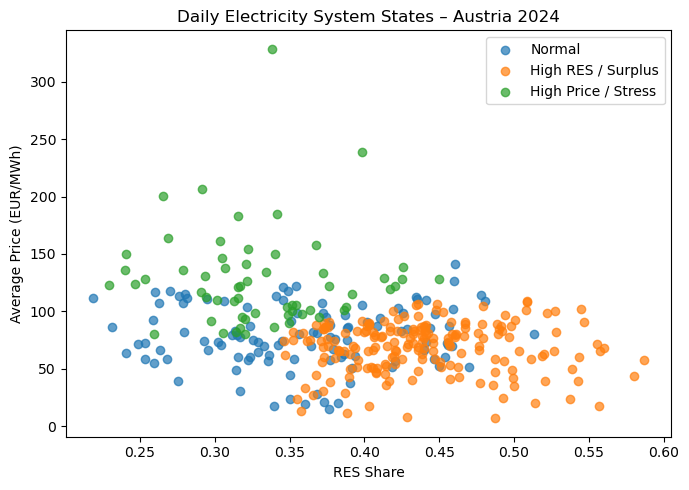

In [26]:
# ======================================================
# INDEPENDENT PIPELINE – PRICE + GENERATION (AT 2024)
# Output:
#   price_df   -> hourly, column: Price_EUR_MWh
#   gen_hourly -> hourly generation mix (MW)
#   daily_df   -> daily features for clustering
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


# ------------------------------------------------------
# 0) Helpers
# ------------------------------------------------------
def load_csv_safe(path):
    try:
        df = pd.read_csv(path, sep=",", encoding="utf-8", low_memory=False)
        if df.shape[1] == 1:
            df = pd.read_csv(path, sep=";", encoding="utf-8", low_memory=False)
        return df
    except Exception:
        return pd.read_csv(path, sep=";", encoding="utf-8", low_memory=False)

def to_numeric(s):
    return pd.to_numeric(
        s.astype(str).str.replace(",", ".", regex=False),
        errors="coerce"
    )

def parse_mtu_start(series):
    s = series.astype(str)
    start = s.str.split(" - ").str[0]
    start = start.str.replace(r"\s*\(.*?\)", "", regex=True)
    return pd.to_datetime(start, dayfirst=True, errors="coerce")


# ======================================================
# 1) PRICE PIPELINE  → price_df (HOURLY, STANDARD NAME)
# ======================================================
price_raw = load_csv_safe("price_AT_2024.csv")
price_raw.columns = price_raw.columns.str.strip()

mtu_col = [c for c in price_raw.columns if "mtu" in c.lower()][0]
price_col = [c for c in price_raw.columns if "price" in c.lower()][0]

price_raw["Time"] = parse_mtu_start(price_raw[mtu_col])
price_raw = price_raw.dropna(subset=["Time"])

price_raw[price_col] = to_numeric(price_raw[price_col])
price_raw = price_raw.dropna(subset=[price_col])

# Aggregate sequences (mean per MTU)
price_15min = (
    price_raw
    .groupby("Time")[price_col]
    .mean()
    .sort_index()
)

# Hourly resample + STANDARD COLUMN NAME
price_df = (
    price_15min
    .resample("H")
    .mean()
    .to_frame("Price_EUR_MWh")
)

price_df["Price_EUR_MWh"] = price_df["Price_EUR_MWh"].interpolate()

print("price_df OK:", price_df.head())


# ======================================================
# 2) GENERATION PIPELINE → gen_hourly (HOURLY MIX)
# ======================================================
gen_raw = load_csv_safe("generation_AT_2024.csv")
gen_raw.columns = gen_raw.columns.str.strip()

mtu_col = [c for c in gen_raw.columns if "mtu" in c.lower()][0]

gen_raw["Time"] = parse_mtu_start(gen_raw[mtu_col])
gen_raw = gen_raw.dropna(subset=["Time"])

gen_raw["Generation (MW)"] = to_numeric(gen_raw["Generation (MW)"])
gen_raw = gen_raw.dropna(subset=["Generation (MW)"])

gen_raw = gen_raw.set_index("Time").sort_index()

gen_hourly = (
    gen_raw
    .groupby([pd.Grouper(freq="H"), "Production Type"])["Generation (MW)"]
    .mean()
    .unstack()
    .fillna(0)
)

print("gen_hourly OK:", gen_hourly.head())


# ======================================================
# 3) BUILD DAILY FEATURES (FOR CLUSTERING / SYSTEM STATES)
# ======================================================
total_load = gen_hourly.sum(axis=1)

res_gen = gen_hourly[
    [c for c in gen_hourly.columns if c in [
        "Solar",
        "Wind Onshore",
        "Hydro Run-of-river and pondage",
        "Hydro Water Reservoir",
        "Hydro Pumped Storage",
        "Biomass",
        "Geothermal"
    ]]
].sum(axis=1)

res_share = (res_gen / total_load).replace([np.inf, -np.inf], np.nan)

hourly_df = pd.DataFrame({
    "Price": price_df["Price_EUR_MWh"],
    "Load": total_load,
    "RES_share": res_share
}).dropna()

daily_df = hourly_df.resample("D").mean()

print("\nDaily features:")
print(daily_df.head())


# ======================================================
# 4) CLUSTERING – DAILY SYSTEM STATES
# ======================================================
scaler = StandardScaler()
X = scaler.fit_transform(daily_df)

kmeans = KMeans(
    n_clusters=3,
    random_state=42,
    n_init=20
)

daily_df["Cluster"] = kmeans.fit_predict(X)

summary = daily_df.groupby("Cluster").mean().round(2)
print("\nCluster centroids:")
print(summary)


# Semantic labels
labels = {}
for c, row in summary.iterrows():
    if row["RES_share"] > summary["RES_share"].median():
        labels[c] = "High RES / Surplus"
    elif row["Price"] > summary["Price"].median():
        labels[c] = "High Price / Stress"
    else:
        labels[c] = "Normal"

daily_df["System_State"] = daily_df["Cluster"].map(labels)

print("\nSystem states:")
print(daily_df["System_State"].value_counts())


# ======================================================
# 5) VISUAL CHECK
# ======================================================
plt.figure(figsize=(7,5))
for state in daily_df["System_State"].unique():
    s = daily_df[daily_df["System_State"] == state]
    plt.scatter(
        s["RES_share"],
        s["Price"],
        label=state,
        alpha=0.7
    )

plt.xlabel("RES Share")
plt.ylabel("Average Price (EUR/MWh)")
plt.title("Daily Electricity System States – Austria 2024")
plt.legend()
plt.tight_layout()
plt.show()


Redispatching costs


Monthly Redispatching Costs (EUR):
            Redispatch_EUR
Month                     
2024-01-01      3671487.27
2024-02-01      4613247.11
2024-03-01      6452928.10
2024-04-01      4280328.50
2024-05-01      9551678.35
2024-06-01     10356870.32
2024-07-01     10951659.84
2024-08-01     13556002.06
2024-09-01     12153348.96
2024-10-01      3156436.48
2024-11-01      2971825.53
2024-12-01      2902081.06


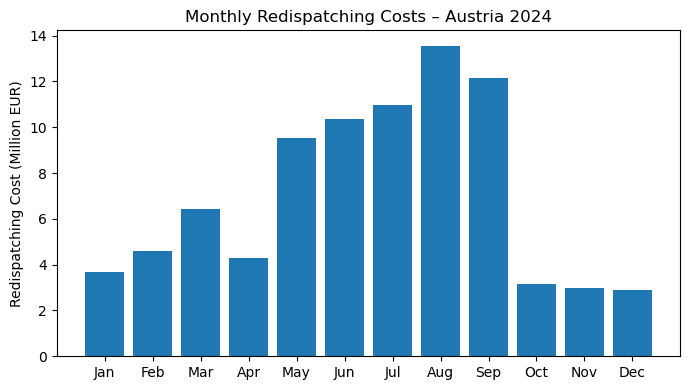

In [27]:
# ======================================================
# CONGESTION COST – MONTHLY (REDISPATCHING ONLY)
# ======================================================

import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1) LOAD DATA
# -----------------------------
cong_df = pd.read_csv(
    "congestion_AT_2024_monthly.csv",
    encoding="utf-8",
    low_memory=False
)

# Clean column names
cong_df.columns = cong_df.columns.str.strip()

# -----------------------------
# 2) PARSE MONTH (ISP START)
# -----------------------------
cong_df["Month"] = (
    cong_df["ISP"]
    .astype(str)
    .str.extract(r'(^\d{2}/\d{2}/\d{4})')[0]
)

cong_df["Month"] = pd.to_datetime(
    cong_df["Month"],
    dayfirst=True,
    errors="coerce"
)

cong_df = cong_df.dropna(subset=["Month"])

# -----------------------------
# 3) NUMERIC REDISPATCH COST
# -----------------------------
cong_df["Redispatch_EUR"] = pd.to_numeric(
    cong_df["Redispatching Costs (value)"]
    .astype(str)
    .str.replace(",", ".", regex=False),
    errors="coerce"
)

cong_df = cong_df.dropna(subset=["Redispatch_EUR"])

# Keep Austria only
cong_df = cong_df[cong_df["Area"].str.contains("AT", na=False)]

# -----------------------------
# 4) FINAL MONTHLY TABLE
# -----------------------------
monthly_redispatch = (
    cong_df
    .set_index("Month")[["Redispatch_EUR"]]
    .sort_index()
)

print("\nMonthly Redispatching Costs (EUR):")
print(monthly_redispatch)

# -----------------------------
# 5) PLOT
# -----------------------------
plt.figure(figsize=(7,4))
plt.bar(
    monthly_redispatch.index.strftime("%b"),
    monthly_redispatch["Redispatch_EUR"] / 1e6
)

plt.ylabel("Redispatching Cost (Million EUR)")
plt.title("Monthly Redispatching Costs – Austria 2024")
plt.tight_layout()
plt.show()


Installed capacity

Capacity columns: ['Time Interval', 'Year', 'Area', 'Production Type', 'Installed Capacity (MW)', 'Total Grand Capacity (MW)']

Installed capacity (MW) – 2024:
                                Capacity_MW
Production Type                            
Solar                               7294.00
Hydro Run-of-river and pondage      5817.00
Fossil Gas                          4225.00
Wind Onshore                        4021.00
Hydro Pumped Storage                3485.00
Hydro Water Reservoir               2519.00
Other                                879.00
Biomass                              549.00
Fossil Oil                           125.00
Waste                                 80.00
Geothermal                             0.25
Fossil Hard coal                       0.00
Fossil Oil shale                       0.00
Fossil Peat                            0.00
Fossil Brown coal/Lignite              0.00
Marine                                 0.00
Nuclear                                0.00
Othe

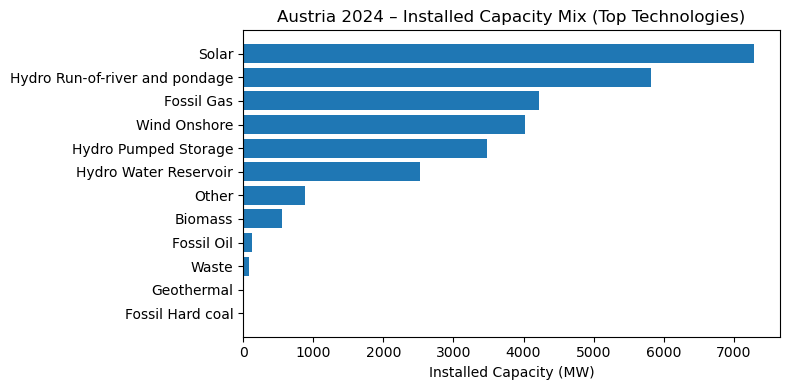

In [29]:
# ======================================================
# INSTALLED CAPACITY & CAPACITY FACTOR – AUSTRIA 2024
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# ======================================================
# 1) LOAD INSTALLED CAPACITY FILE (ROBUST)
# ======================================================
CAP_FILE = "transfer_capacity_AT_2024.csv" 

cap_raw = pd.read_csv(
    CAP_FILE,
    sep=",",
    encoding="utf-8",
    low_memory=False
)

# fallback if separator is ;
if cap_raw.shape[1] == 1:
    cap_raw = pd.read_csv(
        CAP_FILE,
        sep=";",
        encoding="utf-8",
        low_memory=False
    )

cap_raw.columns = cap_raw.columns.str.strip()

print("Capacity columns:", cap_raw.columns.tolist())


# ======================================================
# 2) CLEAN NUMERIC CAPACITY
# ======================================================
cap_raw["Installed Capacity (MW)"] = (
    cap_raw["Installed Capacity (MW)"]
    .astype(str)
    .str.replace(",", ".", regex=False)
    .str.strip()
)

cap_raw["Installed Capacity (MW)"] = pd.to_numeric(
    cap_raw["Installed Capacity (MW)"],
    errors="coerce"   # n/e → NaN
)

# Keep Austria + year 2024
cap_raw = cap_raw[cap_raw["Area"].astype(str).str.contains("AT", na=False)]
cap_raw = cap_raw[cap_raw["Year"] == 2024]

# Aggregate (safety)
cap_2024 = (
    cap_raw
    .groupby("Production Type")["Installed Capacity (MW)"]
    .sum(min_count=1)
    .to_frame("Capacity_MW")
)

cap_2024 = cap_2024.dropna(subset=["Capacity_MW"])

print("\nInstalled capacity (MW) – 2024:")
print(cap_2024.sort_values("Capacity_MW", ascending=False))


# ======================================================
# 3) CAPACITY MIX PLOT
# ======================================================
topN = 12
cap_plot = cap_2024.sort_values("Capacity_MW", ascending=False).head(topN)

plt.figure(figsize=(8,4))
plt.barh(cap_plot.index[::-1], cap_plot["Capacity_MW"][::-1])
plt.xlabel("Installed Capacity (MW)")
plt.title("Austria 2024 – Installed Capacity Mix (Top Technologies)")
plt.tight_layout()
plt.show()


DECOMPOSITION (STL)

C:\Users\mehrd\AppData\Local\Temp\ipykernel_29972\374346088.py:90: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.

C:\Users\mehrd\AppData\Local\Temp\ipykernel_29972\374346088.py:117: FutureWarning:

'H' is deprecated and will be removed in a future version, please use 'h' instead.



Aligned hourly data: (8784, 6)
                     Load_MW  Price_EUR_MWh  Month  Season  IsWeekend  DayType
t                                                                             
2024-01-01 00:00:00   5648.8        3.17500      1  Winter          0  Weekday
2024-01-01 01:00:00   5480.5        1.88375      1  Winter          0  Weekday
2024-01-01 02:00:00   5326.7        1.44250      1  Winter          0  Weekday
2024-01-01 03:00:00   5110.6        1.18500      1  Winter          0  Weekday
2024-01-01 04:00:00   5071.3        1.11875      1  Winter          0  Weekday


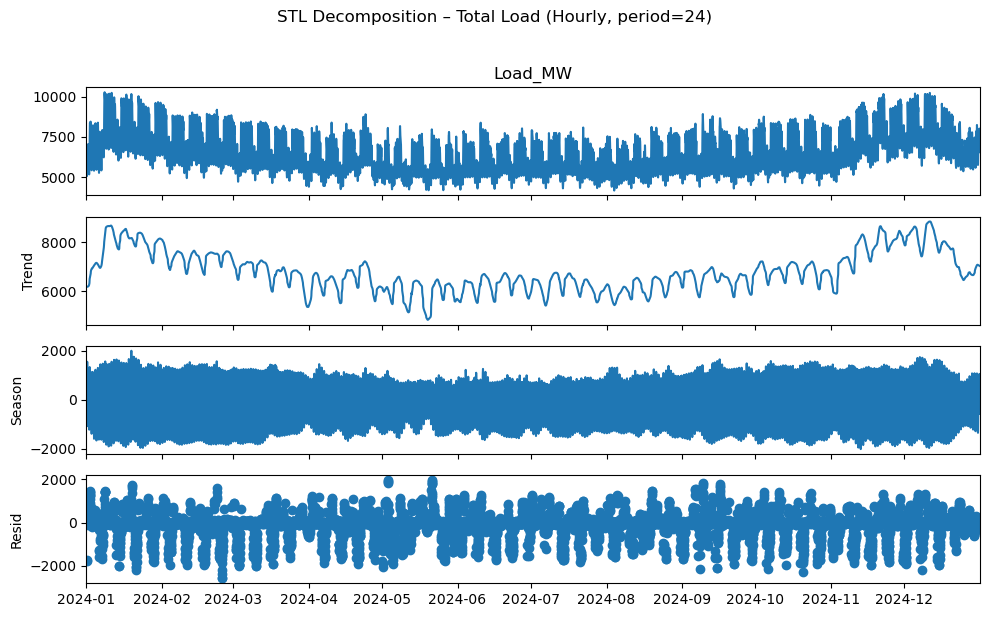

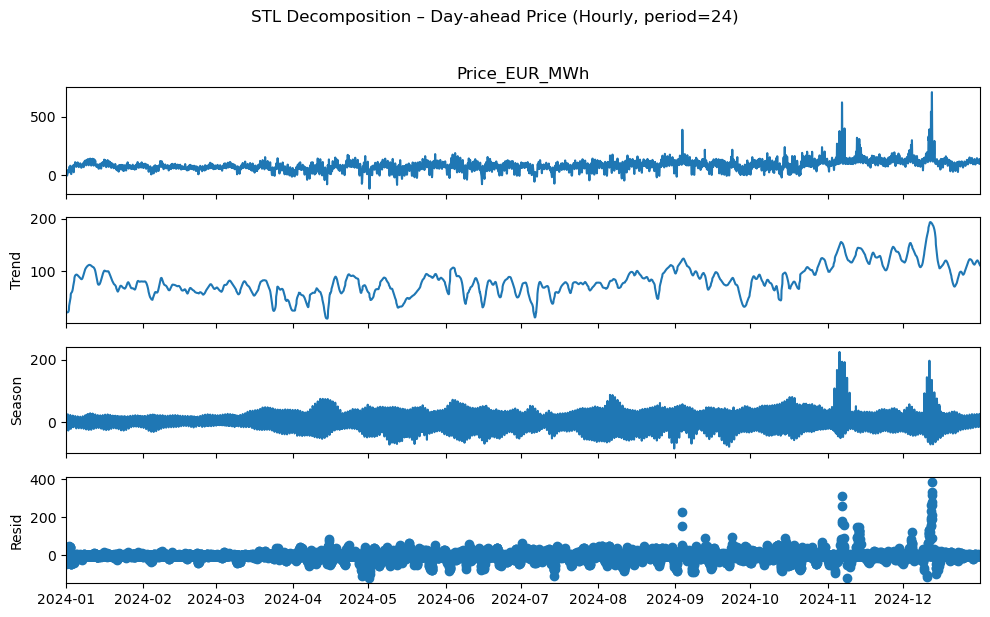

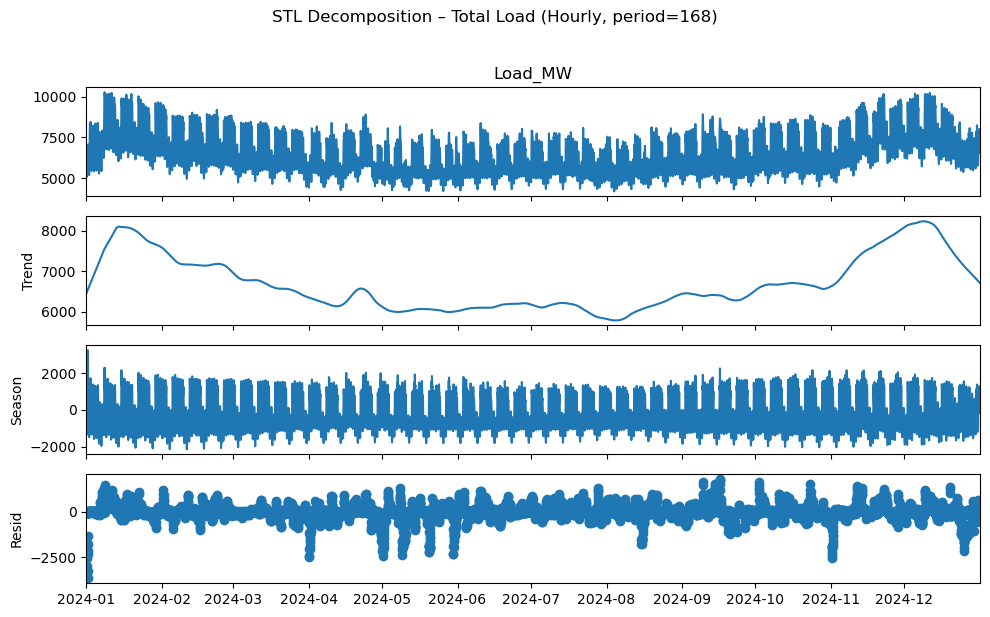

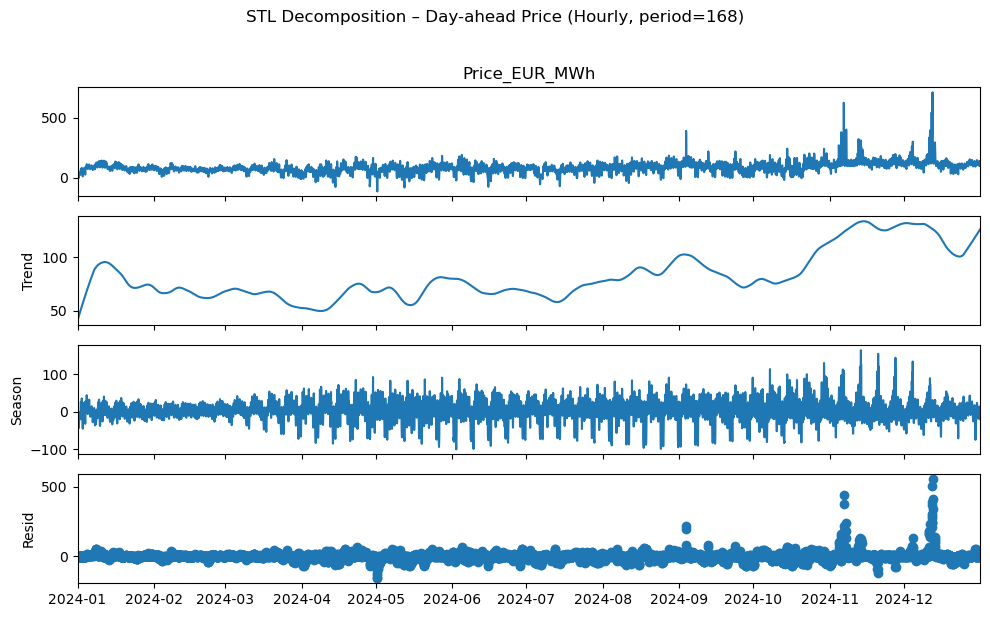

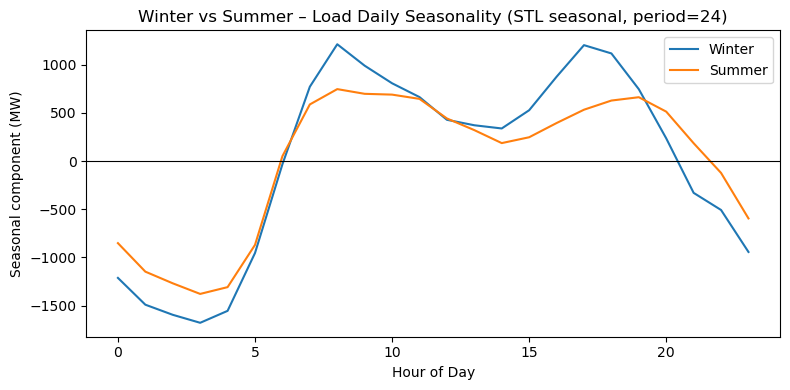

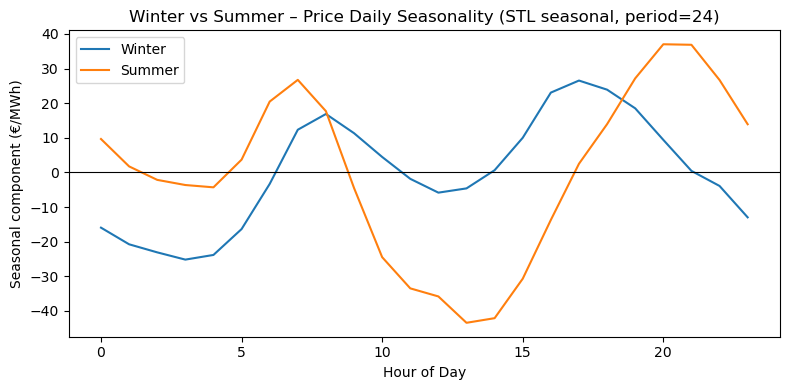

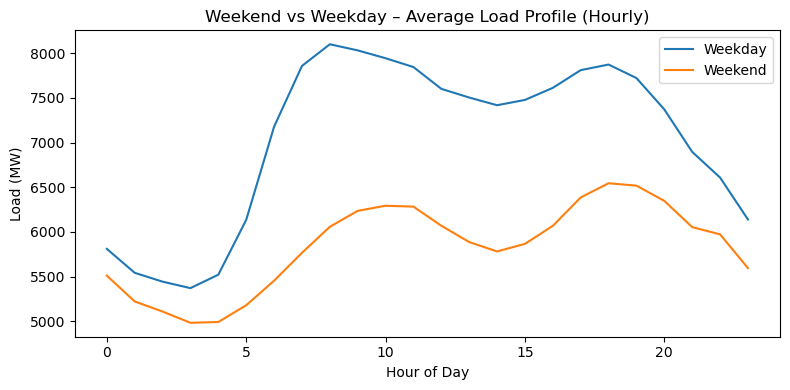

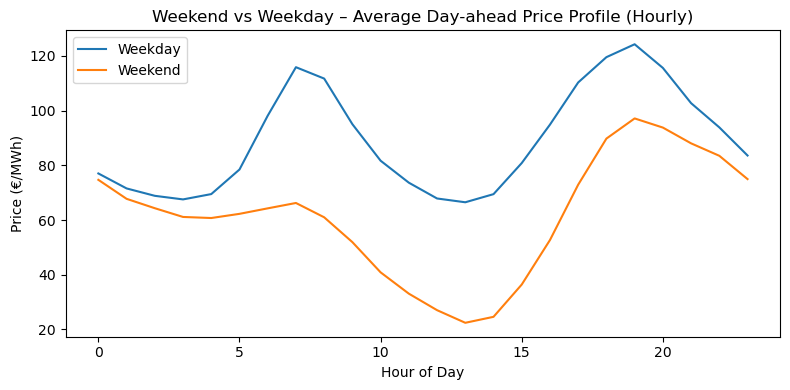

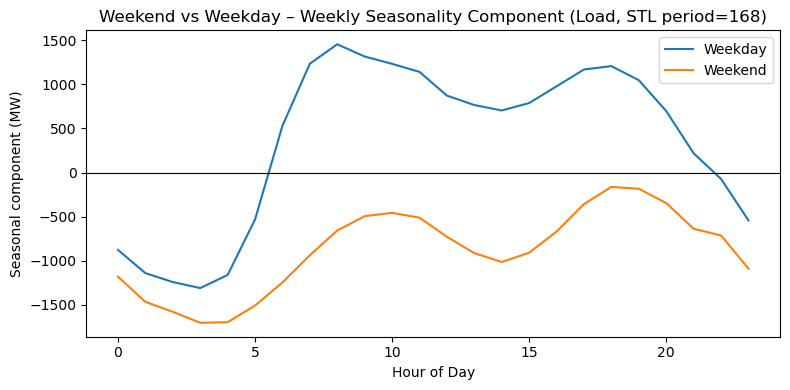

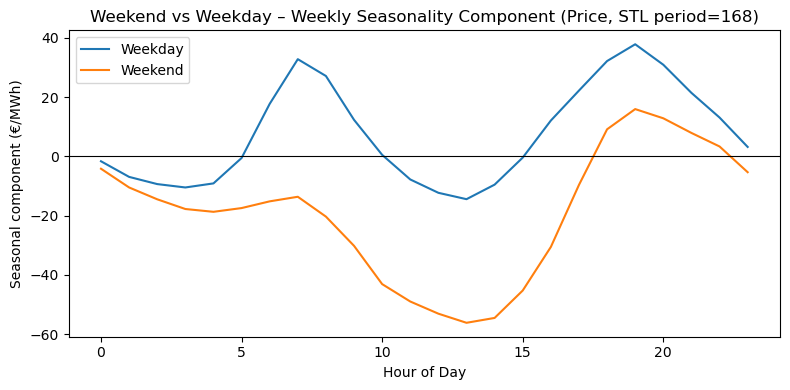


DONE STL decomposition + Winter/Summer + Weekend/Weekday comparisons created.


In [30]:
# ======================================================
# DECOMPOSITION (STL) – AUSTRIA 2024
# - Total Load (Actual)
# - Day-ahead Prices
# Compare:
#   1) Winter vs Summer seasonality
#   2) Weekend vs Weekday effect
#
# Files needed:
# - load_AT_2024.csv          (must contain "MTU (CET/CEST)" + "Actual Total Load (MW)")
# - price_AT_2024.csv         (must contain "MTU (CET/CEST)" + a day-ahead price column)
#
# Notes:
# - We resample to HOURLY and use STL(period=24) to capture daily seasonality.
# - For weekly seasonality, we also run STL(period=168).
# ======================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL


# -----------------------------
# Helpers
# -----------------------------
def load_csv_safe(path: str) -> pd.DataFrame:
    try:
        df = pd.read_csv(path, sep=",", encoding="utf-8", low_memory=False)
        if df.shape[1] == 1:
            df = pd.read_csv(path, sep=";", encoding="utf-8", low_memory=False)
        return df
    except Exception:
        return pd.read_csv(path, sep=";", encoding="utf-8", low_memory=False)


def to_numeric(s: pd.Series) -> pd.Series:
    return pd.to_numeric(
        s.astype(str).str.replace(",", ".", regex=False).str.strip(),
        errors="coerce"
    )


def parse_mtu_start(series: pd.Series) -> pd.Series:
    s = series.astype(str).str.strip()
    a = s.str.extract(r'(^\d{2}/\d{2}/\d{4}\s\d{2}:\d{2}:\d{2})')[0]
    b = s.str.extract(r'(^\d{2}/\d{2}/\d{4}\s\d{2}:\d{2})')[0]
    out = a.fillna(b)
    out = out.fillna(s.str.split(" - ").str[0].str.replace(r"\s*\(.*?\)", "", regex=True))
    return pd.to_datetime(out, format="mixed", dayfirst=True, errors="coerce")


def find_col(cols, key: str):
    key = key.lower()
    for c in cols:
        if key in c.lower():
            return c
    return None


def season_label(month: int) -> str:
    # Simple meteorological seasons
    if month in [12, 1, 2]:
        return "Winter"
    if month in [6, 7, 8]:
        return "Summer"
    return "Shoulder"


def stl_decompose(series: pd.Series, period: int, robust: bool = True):
    series = series.dropna()
    return STL(series, period=period, robust=robust).fit()


# ======================================================
# 1) LOAD + PREP LOAD (HOURLY)
# ======================================================
load_raw = load_csv_safe("load_AT_2024.csv")
load_raw.columns = load_raw.columns.str.strip()

mtu_load = find_col(load_raw.columns, "mtu")
val_load = find_col(load_raw.columns, "actual total load")
if mtu_load is None or val_load is None:
    raise ValueError("load_AT_2024.csv must contain MTU and 'Actual Total Load (MW)' columns (or similar).")

load_raw["t"] = parse_mtu_start(load_raw[mtu_load])
load_raw[val_load] = to_numeric(load_raw[val_load])
load_raw = load_raw.dropna(subset=["t", val_load]).set_index("t").sort_index()

load_h = load_raw[val_load].resample("H").mean()
load_h = load_h.interpolate(limit_direction="both")
load_h.name = "Load_MW"


# ======================================================
# 2) LOAD + PREP PRICE (HOURLY)
# ======================================================
price_raw = load_csv_safe("price_AT_2024.csv")
price_raw.columns = price_raw.columns.str.strip()

mtu_price = find_col(price_raw.columns, "mtu")
if mtu_price is None:
    raise ValueError("price_AT_2024.csv: MTU column not found.")

price_candidates = [c for c in price_raw.columns if "price" in c.lower()]
if not price_candidates:
    raise ValueError("price_AT_2024.csv: no price-like column found.")
day_ahead = [c for c in price_candidates if ("day" in c.lower() and "ahead" in c.lower())]
price_col = day_ahead[0] if day_ahead else price_candidates[0]

price_raw["t"] = parse_mtu_start(price_raw[mtu_price])
price_raw[price_col] = to_numeric(price_raw[price_col])
price_raw = price_raw.dropna(subset=["t", price_col]).set_index("t").sort_index()

# Aggregate sequences to 15-min then hourly
price_15m = price_raw.groupby(price_raw.index)[price_col].mean()
price_h = price_15m.resample("H").mean().interpolate(limit_direction="both")
price_h.name = "Price_EUR_MWh"


# ======================================================
# 3) ALIGN SERIES
# ======================================================
idx = load_h.index.intersection(price_h.index)
load_h = load_h.loc[idx]
price_h = price_h.loc[idx]

df = pd.DataFrame({"Load_MW": load_h, "Price_EUR_MWh": price_h}).dropna()
df["Month"] = df.index.month
df["Season"] = df["Month"].map(season_label)
df["IsWeekend"] = (df.index.dayofweek >= 5).astype(int)
df["DayType"] = np.where(df["IsWeekend"] == 1, "Weekend", "Weekday")

print("Aligned hourly data:", df.shape)
print(df.head())


# ======================================================
# 4) STL DECOMPOSITION (DAILY SEASONALITY: period=24)
# ======================================================
load_stl_24 = stl_decompose(df["Load_MW"], period=24, robust=True)
price_stl_24 = stl_decompose(df["Price_EUR_MWh"], period=24, robust=True)

# Plot STL components
def plot_stl(result, title: str):
    fig = result.plot()
    fig.set_size_inches(10, 6)
    plt.suptitle(title, y=1.02)
    plt.tight_layout()
    plt.show()

plot_stl(load_stl_24, "STL Decomposition – Total Load (Hourly, period=24)")
plot_stl(price_stl_24, "STL Decomposition – Day-ahead Price (Hourly, period=24)")


# ======================================================
# 5) STL DECOMPOSITION (WEEKLY SEASONALITY: period=168)
# ======================================================
# This captures weekday/weekend rhythm directly
load_stl_168 = stl_decompose(df["Load_MW"], period=168, robust=True)
price_stl_168 = stl_decompose(df["Price_EUR_MWh"], period=168, robust=True)

plot_stl(load_stl_168, "STL Decomposition – Total Load (Hourly, period=168)")
plot_stl(price_stl_168, "STL Decomposition – Day-ahead Price (Hourly, period=168)")


# ======================================================
# 6) WINTER vs SUMMER SEASONALITY (Compare average seasonal component)
# ======================================================
# Using seasonal component from period=24 (daily cycle)
df_seasonal = pd.DataFrame({
    "Load_seasonal_24": load_stl_24.seasonal.reindex(df.index),
    "Price_seasonal_24": price_stl_24.seasonal.reindex(df.index),
    "Season": df["Season"],
    "Hour": df.index.hour
}).dropna()

winter = df_seasonal[df_seasonal["Season"] == "Winter"]
summer = df_seasonal[df_seasonal["Season"] == "Summer"]

def plot_winter_summer_hourly(seas_df, col, title, ylabel):
    w = seas_df[seas_df["Season"] == "Winter"].groupby("Hour")[col].mean()
    s = seas_df[seas_df["Season"] == "Summer"].groupby("Hour")[col].mean()

    plt.figure(figsize=(8,4))
    plt.plot(w.index, w.values, label="Winter")
    plt.plot(s.index, s.values, label="Summer")
    plt.axhline(0, color="black", linewidth=0.8)
    plt.title(title)
    plt.xlabel("Hour of Day")
    plt.ylabel(ylabel)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_winter_summer_hourly(
    df_seasonal.assign(Season=df_seasonal["Season"]),
    "Load_seasonal_24",
    "Winter vs Summer – Load Daily Seasonality (STL seasonal, period=24)",
    "Seasonal component (MW)"
)

plot_winter_summer_hourly(
    df_seasonal.assign(Season=df_seasonal["Season"]),
    "Price_seasonal_24",
    "Winter vs Summer – Price Daily Seasonality (STL seasonal, period=24)",
    "Seasonal component (€/MWh)"
)


# ======================================================
# 7) WEEKEND vs WEEKDAY EFFECT
# ======================================================
# (A) Compare mean hourly levels (raw series)
df_levels = df.copy()
df_levels["Hour"] = df_levels.index.hour

load_profile = df_levels.groupby(["DayType", "Hour"])["Load_MW"].mean().unstack(0)
price_profile = df_levels.groupby(["DayType", "Hour"])["Price_EUR_MWh"].mean().unstack(0)

plt.figure(figsize=(8,4))
plt.plot(load_profile.index, load_profile["Weekday"], label="Weekday")
plt.plot(load_profile.index, load_profile["Weekend"], label="Weekend")
plt.title("Weekend vs Weekday – Average Load Profile (Hourly)")
plt.xlabel("Hour of Day")
plt.ylabel("Load (MW)")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(price_profile.index, price_profile["Weekday"], label="Weekday")
plt.plot(price_profile.index, price_profile["Weekend"], label="Weekend")
plt.title("Weekend vs Weekday – Average Day-ahead Price Profile (Hourly)")
plt.xlabel("Hour of Day")
plt.ylabel("Price (€/MWh)")
plt.legend()
plt.tight_layout()
plt.show()

# (B) Compare weekly seasonal component from STL(period=168)
df_week_seasonal = pd.DataFrame({
    "Load_seasonal_168": load_stl_168.seasonal.reindex(df.index),
    "Price_seasonal_168": price_stl_168.seasonal.reindex(df.index),
    "DayType": df["DayType"],
    "Hour": df.index.hour
}).dropna()

load_weekend_effect = df_week_seasonal.groupby(["DayType", "Hour"])["Load_seasonal_168"].mean().unstack(0)
price_weekend_effect = df_week_seasonal.groupby(["DayType", "Hour"])["Price_seasonal_168"].mean().unstack(0)

plt.figure(figsize=(8,4))
plt.plot(load_weekend_effect.index, load_weekend_effect["Weekday"], label="Weekday")
plt.plot(load_weekend_effect.index, load_weekend_effect["Weekend"], label="Weekend")
plt.axhline(0, color="black", linewidth=0.8)
plt.title("Weekend vs Weekday – Weekly Seasonality Component (Load, STL period=168)")
plt.xlabel("Hour of Day")
plt.ylabel("Seasonal component (MW)")
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(8,4))
plt.plot(price_weekend_effect.index, price_weekend_effect["Weekday"], label="Weekday")
plt.plot(price_weekend_effect.index, price_weekend_effect["Weekend"], label="Weekend")
plt.axhline(0, color="black", linewidth=0.8)
plt.title("Weekend vs Weekday – Weekly Seasonality Component (Price, STL period=168)")
plt.xlabel("Hour of Day")
plt.ylabel("Seasonal component (€/MWh)")
plt.legend()
plt.tight_layout()
plt.show()

print("\nDONE STL decomposition + Winter/Summer + Weekend/Weekday comparisons created.")
